# <center> Desafio Bootcamp MIA </center>
## <center> Saída de funcionários de assistência médica </center>


# Nova seção

# O Problema

O seu desafio é utilizar esse conjunto de dados para predizer quando uma pessoa sairá da área médica (attrition) e quais são os fatores relevantes para identificar essa possível saída.
Quem faz mais hora extra costuma sair mais? Tem relação com o salário? Quais outros fatores são relevantes?

[Link do Dataset](https://drive.google.com/file/d/1Teaf1YEnGOsuxWMHJOd-W5sgOPPMAojQ/view?usp=sharing)

# Data Dictionary

* `EmployeeID`: Id do empregado
* `Age`: Idade
* `Attrition`: Variável resposta do modelo, se uma pessoa sairá ou não da área de assistência médica
* `BusinessTravel`: Frequência de viagens a trabalho
* `DailyRate`: valor recebido por dia de trabalho
* `Department`: Departamento do empregado
* `EnvironmentSatisfaction`: Satisfação com o ambiente de trabalho  
* `DistanceFromHome`: Distância do trabalho para casa
* `Education`: Nível de educação. Valor de 1 a 5.
* `EducationField`: Área de formação
* `Gender`: Gênero
* `HourlyRate`: valor recebido por hora de trabalho
* `JobInvolvement`: Envolvimento com o trabalho
* `JobLevel`: Senioridade no trabalho
* `JobRole`: Posição do trabalho
* `JobSatisfaction`: Satisfação com o trabalho
* `MaritalStatus`: Estado civil
* `MonthlyIncome`: Renda mensal
* `MonthlyRate`: valor recebido por mês de trabalho
* `NumCompaniesWorked`: Número de empresas trabalhadas
* `Over18`: Pessoa acima de 18 anos
* `OverTime`: Hora extra
* `PercentSalaryHik`e: Aumento percentual de salário
* `PerformanceRating`: Classificação de desempenho
* `RelationshipSatisfaction`: Satisfação com o relacionamento
* `StandardHours`: Horas padrão
* `Shift`: Turno
* `TotalWorkingYears`: Total de anos trabalhados
* `TrainingTimesLastYear`: Tempo de treinamento ano passado
* `WorkLifeBalance`: Equilíbrio da vida pessoal com a profissional 
* `YearsAtCompany`: Anos na empresa
* `YearsInCurrentRole`: Anos no cargo atual
* `YearsSinceLastPromotion`: Anos desde a última promoção 
* `YearsWithCurrManager`: Anos com o gerente atual



# Análise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/leticiamchd/Datasets/main/watson_healthcare_modified.csv")

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1676, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [6]:
pd.options.display.float_format = '{:.2f}'.format

df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,1676.00,1456795.72,248748.62,1025177.00,1235831.75,1464606.00,1667992.00,1886378.00
Age,1676.00,36.87,9.13,18.00,30.00,36.00,43.00,60.00
DailyRate,1676.00,800.56,401.59,102.00,465.00,796.50,1157.00,1499.00
DistanceFromHome,1676.00,9.22,8.16,1.00,2.00,7.00,14.00,29.00
Education,1676.00,2.91,1.03,1.00,2.00,3.00,4.00,5.00
EmployeeCount,1676.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EnvironmentSatisfaction,1676.00,2.71,1.10,1.00,2.00,3.00,4.00,4.00
HourlyRate,1676.00,65.47,20.21,30.00,48.00,65.50,83.00,100.00
JobInvolvement,1676.00,2.72,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,1676.00,2.07,1.11,1.00,1.00,2.00,3.00,5.00


In [7]:
df.duplicated().sum()

0

# Análise Exploratória

## EmployeeID

In [ ]:
df["EmployeeID"].duplicated().sum()

0

## Age

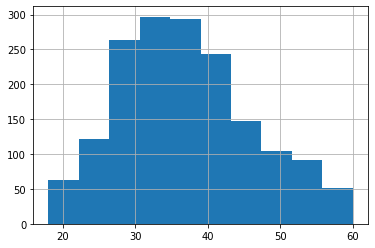

In [ ]:
df["Age"].hist()

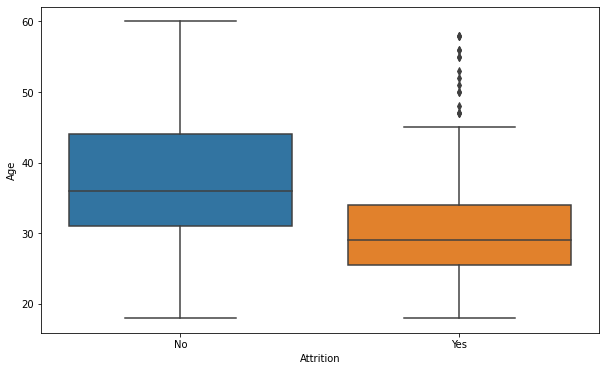

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, y="Age", x="Attrition")
plt.show()

In [ ]:
df.groupby("Attrition")["Age"].mean()

Attrition
No    37.67
Yes   30.90
Name: Age, dtype: float64

Aparentemente pessoas mais novas tendem a sair

## BusinessTravel

In [ ]:
df.groupby("Attrition")["BusinessTravel"].value_counts()

Attrition  BusinessTravel   
No         Travel_Rarely        1058
           Travel_Frequently     263
           Non-Travel            156
Yes        Travel_Rarely         126
           Travel_Frequently      57
           Non-Travel             16
Name: BusinessTravel, dtype: int64

In [ ]:
df["BusinessTravel"].value_counts()

Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64

In [ ]:
df["BusinessTravel"].value_counts() / df.shape[0] * 100

Travel_Rarely       70.64
Travel_Frequently   19.09
Non-Travel          10.26
Name: BusinessTravel, dtype: float64

In [ ]:
# Opção ao bloco anterior 
df["BusinessTravel"].value_counts(normalize=True)

Travel_Rarely       0.71
Travel_Frequently   0.19
Non-Travel          0.10
Name: BusinessTravel, dtype: float64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelas caracerísticas de viagem a trabalho
temp = df.groupby("Attrition")["BusinessTravel"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,BusinessTravel,Number_Employees
0,No,Travel_Rarely,1058
1,No,Travel_Frequently,263
2,No,Non-Travel,156
3,Yes,Travel_Rarely,126
4,Yes,Travel_Frequently,57
5,Yes,Non-Travel,16


In [ ]:
# Criando nova coluna para o somatório de tosdos as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,BusinessTravel,Number_Employees,total_employees
0,No,Travel_Rarely,1058,0
1,No,Travel_Frequently,263,0
2,No,Non-Travel,156,0
3,Yes,Travel_Rarely,126,0
4,Yes,Travel_Frequently,57,0
5,Yes,Non-Travel,16,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,BusinessTravel,Number_Employees,total_employees
0,No,Travel_Rarely,1058,1477
1,No,Travel_Frequently,263,1477
2,No,Non-Travel,156,1477
3,Yes,Travel_Rarely,126,199
4,Yes,Travel_Frequently,57,199
5,Yes,Non-Travel,16,199


In [ ]:
# Criand nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,BusinessTravel,Number_Employees,total_employees,percentage
0,No,Travel_Rarely,1058,1477,71.63
1,No,Travel_Frequently,263,1477,17.81
2,No,Non-Travel,156,1477,10.56
3,Yes,Travel_Rarely,126,199,63.32
4,Yes,Travel_Frequently,57,199,28.64
5,Yes,Non-Travel,16,199,8.04


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "BusinessTravel", "percentage"]]
temp

,Attrition,BusinessTravel,percentage
0,No,Travel_Rarely,71.63
1,No,Travel_Frequently,17.81
2,No,Non-Travel,10.56
3,Yes,Travel_Rarely,63.32
4,Yes,Travel_Frequently,28.64
5,Yes,Non-Travel,8.04


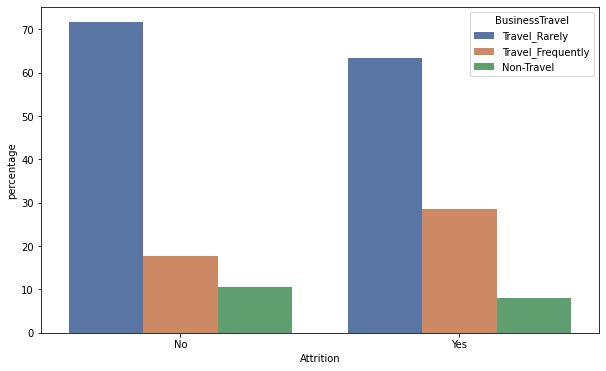

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="BusinessTravel", palette="deep", ax=ax, data = temp)
plt.show()

É possível perceber que a proporção de pessoas que viajam a trabalho frequentemente é maior naqueles que saíram 

In [ ]:
df.groupby("BusinessTravel")["Age"].mean()

BusinessTravel
Non-Travel          36.76
Travel_Frequently   36.30
Travel_Rarely       37.03
Name: Age, dtype: float64

Sem diferença quanto a idade em relação a frequência de viagens à trabalho 

## DailyRate

What Is a Day Rate? A day rate is the billing cost for an individual's services for a single day.

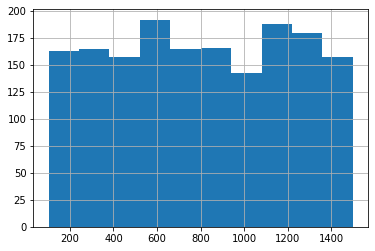

In [ ]:
df["DailyRate"].hist()

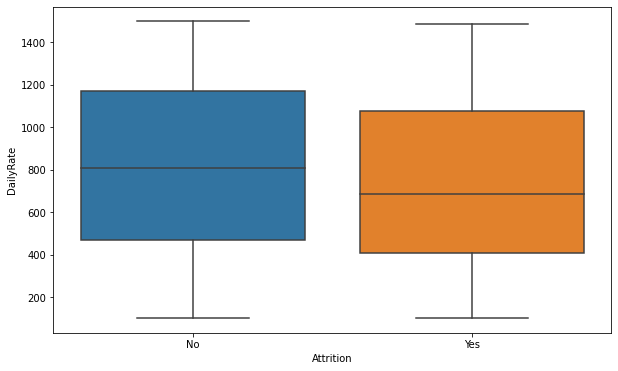

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, y="DailyRate", x="Attrition")
plt.show()

In [ ]:
df.groupby("Attrition")["DailyRate"].mean()

Attrition
No    808.50
Yes   741.61
Name: DailyRate, dtype: float64

Não parece ter tanta diferença no valor que os profissionais recebem por dia

## Department

In [ ]:
df["Department"].value_counts()

Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64

In [ ]:
df["Department"].value_counts() / df.shape[0] * 100

Maternity    47.49
Cardiology   31.68
Neurology    20.82
Name: Department, dtype: float64

In [ ]:
df.groupby("Attrition")["Department"].value_counts()

Attrition  Department
No         Maternity     698
           Cardiology    457
           Neurology     322
Yes        Maternity      98
           Cardiology     74
           Neurology      27
Name: Department, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo departamento de trabalho
temp = df.groupby("Attrition")["Department"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,Department,Number_Employees
0,No,Maternity,698
1,No,Cardiology,457
2,No,Neurology,322
3,Yes,Maternity,98
4,Yes,Cardiology,74
5,Yes,Neurology,27


In [ ]:
# Criando nova coluna para o somatório de tosdos as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,Department,Number_Employees,total_employees
0,No,Maternity,698,0
1,No,Cardiology,457,0
2,No,Neurology,322,0
3,Yes,Maternity,98,0
4,Yes,Cardiology,74,0
5,Yes,Neurology,27,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,Department,Number_Employees,total_employees
0,No,Maternity,698,1477
1,No,Cardiology,457,1477
2,No,Neurology,322,1477
3,Yes,Maternity,98,199
4,Yes,Cardiology,74,199
5,Yes,Neurology,27,199


In [ ]:
# Criand nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,Department,Number_Employees,total_employees,percentage
0,No,Maternity,698,1477,47.26
1,No,Cardiology,457,1477,30.94
2,No,Neurology,322,1477,21.80
3,Yes,Maternity,98,199,49.25
4,Yes,Cardiology,74,199,37.19
5,Yes,Neurology,27,199,13.57


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "Department", "percentage"]]
temp

,Attrition,Department,percentage
0,No,Maternity,47.26
1,No,Cardiology,30.94
2,No,Neurology,21.80
3,Yes,Maternity,49.25
4,Yes,Cardiology,37.19
5,Yes,Neurology,13.57


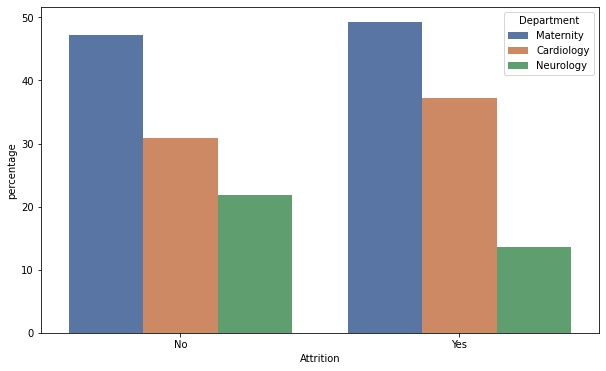

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="Department", palette="deep", ax=ax, data = temp)
plt.show()

Aqueles tanto da áreas de Obstetrícia (Maternidade) quanto na área de Cardiologia tiveream maior proporção naqueles esmpregados que optaram por sair

In [ ]:
df.groupby("Department")["Age"].mean()

Department
Cardiology   36.58
Maternity    36.24
Neurology    38.74
Name: Age, dtype: float64

In [ ]:
# Verificando a média do valor recebido de cada departamento
df.groupby("Department")["DailyRate"].mean()

Department
Cardiology   789.25
Maternity    808.24
Neurology    800.25
Name: DailyRate, dtype: float64

## EnvironmentSatisfaction

In [ ]:
df["EnvironmentSatisfaction"].value_counts()

3    512
4    508
1    330
2    326
Name: EnvironmentSatisfaction, dtype: int64

In [ ]:
df["EnvironmentSatisfaction"].value_counts() / df.shape[0] * 100

3   30.55
4   30.31
1   19.69
2   19.45
Name: EnvironmentSatisfaction, dtype: float64

In [ ]:
df.groupby("Attrition")["EnvironmentSatisfaction"].value_counts()

Attrition  EnvironmentSatisfaction
No         3                          464
           4                          459
           2                          288
           1                          266
Yes        1                           64
           4                           49
           3                           48
           2                           38
Name: EnvironmentSatisfaction, dtype: int64

Aqueles que optaram por sair, tinham menor satisfação com o ambiente

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo satisfação com o ambiente
temp = df.groupby("Attrition")["EnvironmentSatisfaction"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,EnvironmentSatisfaction,Number_Employees
0,No,3,464
1,No,4,459
2,No,2,288
3,No,1,266
4,Yes,1,64
5,Yes,4,49
6,Yes,3,48
7,Yes,2,38


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,EnvironmentSatisfaction,Number_Employees,total_employees
0,No,3,464,0
1,No,4,459,0
2,No,2,288,0
3,No,1,266,0
4,Yes,1,64,0
5,Yes,4,49,0
6,Yes,3,48,0
7,Yes,2,38,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,EnvironmentSatisfaction,Number_Employees,total_employees
0,No,3,464,1477
1,No,4,459,1477
2,No,2,288,1477
3,No,1,266,1477
4,Yes,1,64,199
5,Yes,4,49,199
6,Yes,3,48,199
7,Yes,2,38,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,EnvironmentSatisfaction,Number_Employees,total_employees,percentage
0,No,3,464,1477,31.42
1,No,4,459,1477,31.08
2,No,2,288,1477,19.50
3,No,1,266,1477,18.01
4,Yes,1,64,199,32.16
5,Yes,4,49,199,24.62
6,Yes,3,48,199,24.12
7,Yes,2,38,199,19.10


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "EnvironmentSatisfaction", "percentage"]]
temp

,Attrition,EnvironmentSatisfaction,percentage
0,No,3,31.42
1,No,4,31.08
2,No,2,19.50
3,No,1,18.01
4,Yes,1,32.16
5,Yes,4,24.62
6,Yes,3,24.12
7,Yes,2,19.10


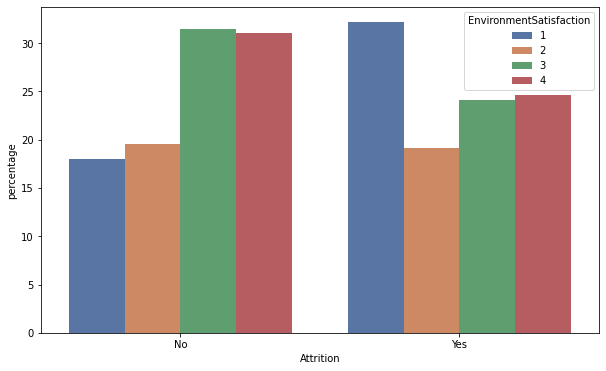

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="EnvironmentSatisfaction", palette="deep", ax=ax, data = temp)
plt.show()

A menor satifação com o ambiente possui uma proporção bem maior naqueles que optaram por sair

In [ ]:
# Existe Alguma diferença de idade de acordo com a satisfação com o ambiente
df.groupby("EnvironmentSatisfaction")["Age"].mean()

EnvironmentSatisfaction
1   37.07
2   36.40
3   36.77
4   37.13
Name: Age, dtype: float64

Bem semelhantes

In [ ]:
# Existe Alguma diferença da média do valor recebido de acordo com a satisfação com o ambiente
df.groupby("EnvironmentSatisfaction")["DailyRate"].mean()

EnvironmentSatisfaction
1   796.65
2   791.26
3   804.64
4   804.95
Name: DailyRate, dtype: float64

## DistanceFromHome

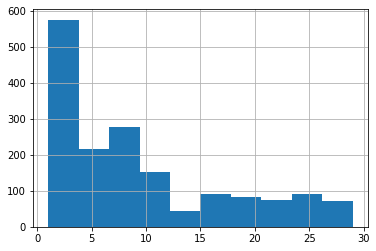

In [ ]:
df["DistanceFromHome"].hist()

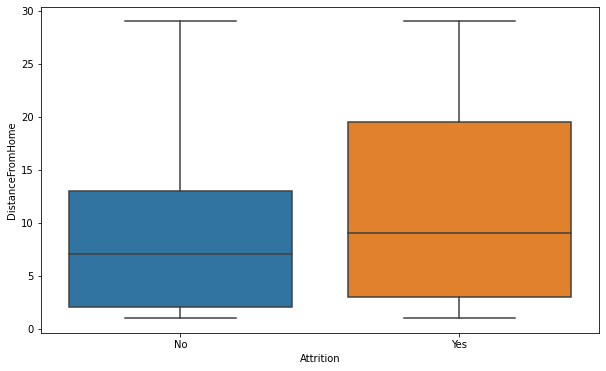

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, y="DistanceFromHome", x="Attrition")
plt.show()

In [ ]:
df.groupby("Attrition")["DistanceFromHome"].mean()

Attrition
No     8.91
Yes   11.57
Name: DistanceFromHome, dtype: float64

## Education

In [ ]:
df["Education"].value_counts()

3    655
4    447
2    322
1    196
5     56
Name: Education, dtype: int64

In [ ]:
df["Education"].value_counts() / df.shape[0] * 100

3   39.08
4   26.67
2   19.21
1   11.69
5    3.34
Name: Education, dtype: float64

In [ ]:
df.groupby("Attrition")["Education"].value_counts() 

Attrition  Education
No         3            566
           4            400
           2            287
           1            169
           5             55
Yes        3             89
           4             47
           2             35
           1             27
           5              1
Name: Education, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo nível de educação
temp = df.groupby("Attrition")["Education"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,Education,Number_Employees
0,No,3,566
1,No,4,400
2,No,2,287
3,No,1,169
4,No,5,55
5,Yes,3,89
6,Yes,4,47
7,Yes,2,35
8,Yes,1,27
9,Yes,5,1


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,Education,Number_Employees,total_employees
0,No,3,566,0
1,No,4,400,0
2,No,2,287,0
3,No,1,169,0
4,No,5,55,0
5,Yes,3,89,0
6,Yes,4,47,0
7,Yes,2,35,0
8,Yes,1,27,0
9,Yes,5,1,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,Education,Number_Employees,total_employees
0,No,3,566,1477
1,No,4,400,1477
2,No,2,287,1477
3,No,1,169,1477
4,No,5,55,1477
5,Yes,3,89,199
6,Yes,4,47,199
7,Yes,2,35,199
8,Yes,1,27,199
9,Yes,5,1,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,Education,Number_Employees,total_employees,percentage
0,No,3,566,1477,38.32
1,No,4,400,1477,27.08
2,No,2,287,1477,19.43
3,No,1,169,1477,11.44
4,No,5,55,1477,3.72
5,Yes,3,89,199,44.72
6,Yes,4,47,199,23.62
7,Yes,2,35,199,17.59
8,Yes,1,27,199,13.57
9,Yes,5,1,199,0.50


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "Education", "percentage"]]
temp

,Attrition,Education,percentage
0,No,3,38.32
1,No,4,27.08
2,No,2,19.43
3,No,1,11.44
4,No,5,3.72
5,Yes,3,44.72
6,Yes,4,23.62
7,Yes,2,17.59
8,Yes,1,13.57
9,Yes,5,0.50


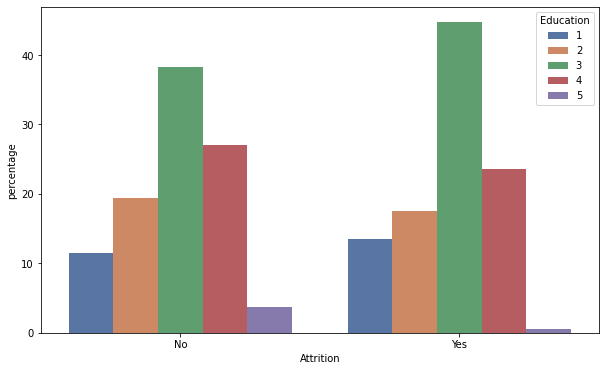

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="Education", palette="deep", ax=ax, data = temp)
plt.show()

In [ ]:
# Média do valor recebido por dia de acordo com o nível de educação
df.groupby("Education")["DailyRate"].mean()

Education
1   825.20
2   818.58
3   775.75
4   815.60
5   780.75
Name: DailyRate, dtype: float64

In [ ]:
# Média do valor recebido por dia de acordo com a idade
df.groupby("Education")["Age"].mean()

Education
1   32.36
2   36.86
3   36.29
4   39.29
5   40.05
Name: Age, dtype: float64

Todo sentido que quanto maior o nível de educação, maior a idade

## EducationField

In [ ]:
df["EducationField"].value_counts()

Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64

In [ ]:
df["EducationField"].value_counts() / df.shape[0] * 100

Life Sciences      41.59
Medical            31.26
Marketing          11.28
Technical Degree    8.89
Other               5.25
Human Resources     1.73
Name: EducationField, dtype: float64

In [ ]:
df.groupby("Attrition")["EducationField"].value_counts()

Attrition  EducationField  
No         Life Sciences       613
           Medical             473
           Marketing           161
           Technical Degree    127
           Other                80
           Human Resources      23
Yes        Life Sciences        84
           Medical              51
           Marketing            28
           Technical Degree     22
           Other                 8
           Human Resources       6
Name: EducationField, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pela área de atuação
temp = df.groupby("Attrition")["EducationField"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,EducationField,Number_Employees
0,No,Life Sciences,613
1,No,Medical,473
2,No,Marketing,161
3,No,Technical Degree,127
4,No,Other,80
5,No,Human Resources,23
6,Yes,Life Sciences,84
7,Yes,Medical,51
8,Yes,Marketing,28
9,Yes,Technical Degree,22


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,EducationField,Number_Employees,total_employees
0,No,Life Sciences,613,0
1,No,Medical,473,0
2,No,Marketing,161,0
3,No,Technical Degree,127,0
4,No,Other,80,0
5,No,Human Resources,23,0
6,Yes,Life Sciences,84,0
7,Yes,Medical,51,0
8,Yes,Marketing,28,0
9,Yes,Technical Degree,22,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,EducationField,Number_Employees,total_employees
0,No,Life Sciences,613,1477
1,No,Medical,473,1477
2,No,Marketing,161,1477
3,No,Technical Degree,127,1477
4,No,Other,80,1477
5,No,Human Resources,23,1477
6,Yes,Life Sciences,84,199
7,Yes,Medical,51,199
8,Yes,Marketing,28,199
9,Yes,Technical Degree,22,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,EducationField,Number_Employees,total_employees,percentage
0,No,Life Sciences,613,1477,41.50
1,No,Medical,473,1477,32.02
2,No,Marketing,161,1477,10.90
3,No,Technical Degree,127,1477,8.60
4,No,Other,80,1477,5.42
5,No,Human Resources,23,1477,1.56
6,Yes,Life Sciences,84,199,42.21
7,Yes,Medical,51,199,25.63
8,Yes,Marketing,28,199,14.07
9,Yes,Technical Degree,22,199,11.06


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "EducationField", "percentage"]]
temp

,Attrition,EducationField,percentage
0,No,Life Sciences,41.50
1,No,Medical,32.02
2,No,Marketing,10.90
3,No,Technical Degree,8.60
4,No,Other,5.42
5,No,Human Resources,1.56
6,Yes,Life Sciences,42.21
7,Yes,Medical,25.63
8,Yes,Marketing,14.07
9,Yes,Technical Degree,11.06


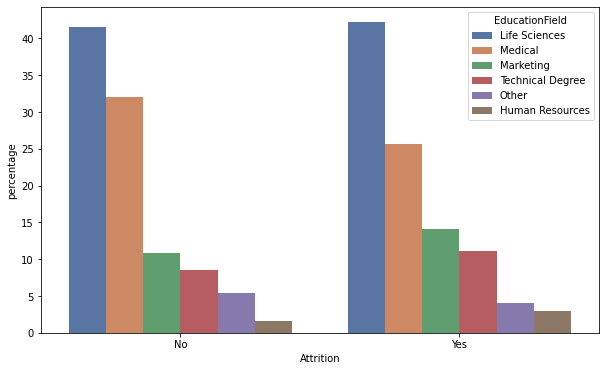

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="EducationField", palette="deep", ax=ax, data = temp)
plt.show()

In [ ]:
df.groupby("EducationField")["BusinessTravel"].value_counts()

EducationField    BusinessTravel   
Human Resources   Travel_Rarely         18
                  Travel_Frequently      6
                  Non-Travel             5
Life Sciences     Travel_Rarely        485
                  Travel_Frequently    142
                  Non-Travel            70
Marketing         Travel_Rarely        143
                  Travel_Frequently     33
                  Non-Travel            13
Medical           Travel_Rarely        364
                  Travel_Frequently    100
                  Non-Travel            60
Other             Travel_Rarely         65
                  Travel_Frequently     16
                  Non-Travel             7
Technical Degree  Travel_Rarely        109
                  Travel_Frequently     23
                  Non-Travel            17
Name: BusinessTravel, dtype: int64

In [ ]:
df.groupby("EducationField")["EnvironmentSatisfaction"].value_counts()

EducationField    EnvironmentSatisfaction
Human Resources   3                           13
                  1                            6
                  4                            6
                  2                            4
Life Sciences     4                          209
                  3                          208
                  1                          152
                  2                          128
Marketing         4                           57
                  3                           56
                  2                           42
                  1                           34
Medical           4                          155
                  3                          150
                  2                          118
                  1                          101
Other             4                           33
                  3                           32
                  2                           13
                  1        

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela área de atuação, e pela satisfação com o ambiente
temp = df.groupby("EducationField")["EnvironmentSatisfaction"].value_counts().reset_index(name="Number_Employees")
temp

,EducationField,EnvironmentSatisfaction,Number_Employees
0,Human Resources,3,13
1,Human Resources,1,6
2,Human Resources,4,6
3,Human Resources,2,4
4,Life Sciences,4,209
5,Life Sciences,3,208
6,Life Sciences,1,152
7,Life Sciences,2,128
8,Marketing,4,57
9,Marketing,3,56


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,EducationField,EnvironmentSatisfaction,Number_Employees,total_employees
0,Human Resources,3,13,0
1,Human Resources,1,6,0
2,Human Resources,4,6,0
3,Human Resources,2,4,0
4,Life Sciences,4,209,0
5,Life Sciences,3,208,0
6,Life Sciences,1,152,0
7,Life Sciences,2,128,0
8,Marketing,4,57,0
9,Marketing,3,56,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["EducationField"] == "Human Resources"] = df.loc[df["EducationField"] == "Human Resources"].shape[0]
temp["total_employees"].loc[temp["EducationField"] == "Life Sciences"] = df.loc[df["EducationField"] == "Life Sciences"].shape[0]
temp["total_employees"].loc[temp["EducationField"] == "Marketing"] = df.loc[df["EducationField"] == "Marketing"].shape[0]
temp["total_employees"].loc[temp["EducationField"] == "Medical"] = df.loc[df["EducationField"] == "Medical"].shape[0]
temp["total_employees"].loc[temp["EducationField"] == "Other"] = df.loc[df["EducationField"] == "Other"].shape[0]
temp["total_employees"].loc[temp["EducationField"] == "Technical Degree"] = df.loc[df["EducationField"] == "Technical Degree"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,EducationField,EnvironmentSatisfaction,Number_Employees,total_employees
0,Human Resources,3,13,29
1,Human Resources,1,6,29
2,Human Resources,4,6,29
3,Human Resources,2,4,29
4,Life Sciences,4,209,697
5,Life Sciences,3,208,697
6,Life Sciences,1,152,697
7,Life Sciences,2,128,697
8,Marketing,4,57,189
9,Marketing,3,56,189


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,EducationField,EnvironmentSatisfaction,Number_Employees,total_employees,percentage
0,Human Resources,3,13,29,44.83
1,Human Resources,1,6,29,20.69
2,Human Resources,4,6,29,20.69
3,Human Resources,2,4,29,13.79
4,Life Sciences,4,209,697,29.99
5,Life Sciences,3,208,697,29.84
6,Life Sciences,1,152,697,21.81
7,Life Sciences,2,128,697,18.36
8,Marketing,4,57,189,30.16
9,Marketing,3,56,189,29.63


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["EducationField", "EnvironmentSatisfaction", "percentage"]]
temp

,EducationField,EnvironmentSatisfaction,percentage
0,Human Resources,3,44.83
1,Human Resources,1,20.69
2,Human Resources,4,20.69
3,Human Resources,2,13.79
4,Life Sciences,4,29.99
5,Life Sciences,3,29.84
6,Life Sciences,1,21.81
7,Life Sciences,2,18.36
8,Marketing,4,30.16
9,Marketing,3,29.63


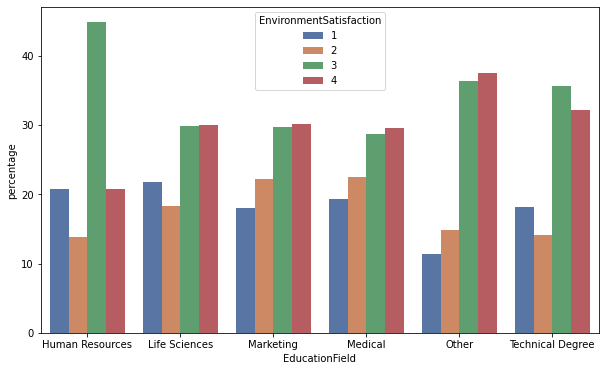

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="EducationField", y = "percentage", hue="EnvironmentSatisfaction", palette="deep", ax=ax, data = temp)
plt.show()

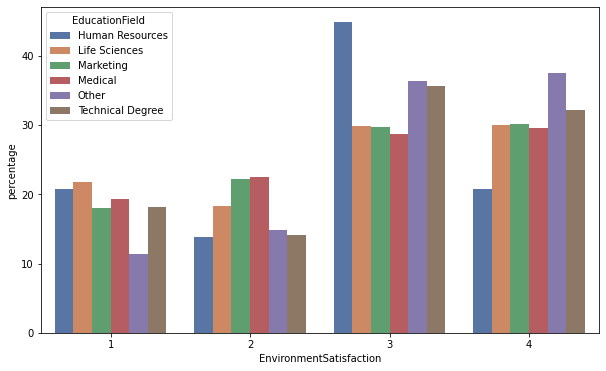

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="EnvironmentSatisfaction", y = "percentage", hue="EducationField", palette="deep", ax=ax, data = temp)
plt.show()

## EmployeeCount

In [ ]:
df["EmployeeCount"].value_counts()

1    1676
Name: EmployeeCount, dtype: int64

## Gender

In [ ]:
df["Gender"].value_counts()

Male      998
Female    678
Name: Gender, dtype: int64

In [ ]:
df["Gender"].value_counts() / df.shape[0] * 100

Male     59.55
Female   40.45
Name: Gender, dtype: float64

In [ ]:
df.groupby("Attrition")["Gender"].value_counts()

Attrition  Gender
No         Male      885
           Female    592
Yes        Male      113
           Female     86
Name: Gender, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo gênero
temp = df.groupby("Attrition")["Gender"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,Gender,Number_Employees
0,No,Male,885
1,No,Female,592
2,Yes,Male,113
3,Yes,Female,86


In [ ]:
# Criando nova coluna para o somatório de tosdos as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,Gender,Number_Employees,total_employees
0,No,Male,885,0
1,No,Female,592,0
2,Yes,Male,113,0
3,Yes,Female,86,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,Gender,Number_Employees,total_employees
0,No,Male,885,1477
1,No,Female,592,1477
2,Yes,Male,113,199
3,Yes,Female,86,199


In [ ]:
# Criand nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,Gender,Number_Employees,total_employees,percentage
0,No,Male,885,1477,59.92
1,No,Female,592,1477,40.08
2,Yes,Male,113,199,56.78
3,Yes,Female,86,199,43.22


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "Gender", "percentage"]]
temp

,Attrition,Gender,percentage
0,No,Male,59.92
1,No,Female,40.08
2,Yes,Male,56.78
3,Yes,Female,43.22


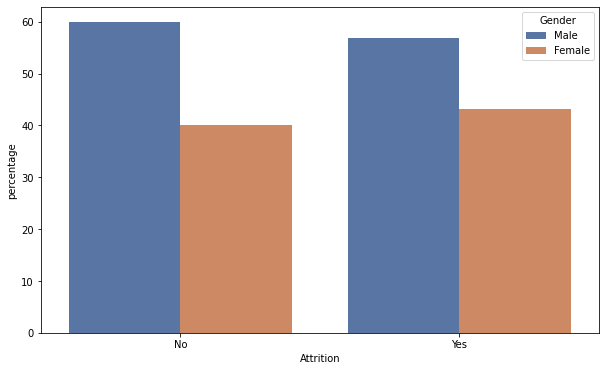

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="Gender", palette="deep", ax=ax, data = temp)
plt.show()

Diferença bem pequena entre os dois grupos 

## HourlyRate

What is an hourly rate? Your hourly rate is the amount of money you earn for each hour you spend working

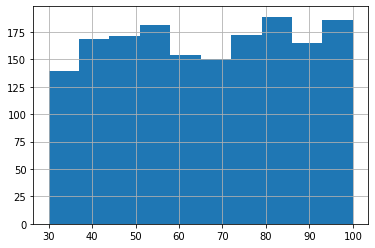

In [ ]:
df["HourlyRate"].hist()

In [ ]:
df.groupby("Attrition")["HourlyRate"].mean()

Attrition
No    65.74
Yes   63.47
Name: HourlyRate, dtype: float64

In [ ]:
df.groupby("Department")["HourlyRate"].mean()

Department
Cardiology   65.61
Maternity    66.23
Neurology    63.53
Name: HourlyRate, dtype: float64

In [ ]:
df.groupby("EnvironmentSatisfaction")["HourlyRate"].mean()

EnvironmentSatisfaction
1   66.75
2   66.81
3   65.46
4   63.79
Name: HourlyRate, dtype: float64

In [ ]:
df.groupby("Gender")["HourlyRate"].mean()

Gender
Female   65.46
Male     65.47
Name: HourlyRate, dtype: float64

## JobInvolvement

In [ ]:
df["JobInvolvement"].value_counts()

3    983
2    433
4    164
1     96
Name: JobInvolvement, dtype: int64

In [ ]:
df["JobInvolvement"].value_counts() / df.shape[0] * 100

3   58.65
2   25.84
4    9.79
1    5.73
Name: JobInvolvement, dtype: float64

In [ ]:
df.groupby("Attrition")["JobInvolvement"].value_counts()

Attrition  JobInvolvement
No         3                 894
           2                 362
           4                 154
           1                  67
Yes        3                  89
           2                  71
           1                  29
           4                  10
Name: JobInvolvement, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo envolvimento com o trabalho 
temp = df.groupby("Attrition")["JobInvolvement"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,JobInvolvement,Number_Employees
0,No,3,894
1,No,2,362
2,No,4,154
3,No,1,67
4,Yes,3,89
5,Yes,2,71
6,Yes,1,29
7,Yes,4,10


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,JobInvolvement,Number_Employees,total_employees
0,No,3,894,0
1,No,2,362,0
2,No,4,154,0
3,No,1,67,0
4,Yes,3,89,0
5,Yes,2,71,0
6,Yes,1,29,0
7,Yes,4,10,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,JobInvolvement,Number_Employees,total_employees
0,No,3,894,1477
1,No,2,362,1477
2,No,4,154,1477
3,No,1,67,1477
4,Yes,3,89,199
5,Yes,2,71,199
6,Yes,1,29,199
7,Yes,4,10,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,JobInvolvement,Number_Employees,total_employees,percentage
0,No,3,894,1477,60.53
1,No,2,362,1477,24.51
2,No,4,154,1477,10.43
3,No,1,67,1477,4.54
4,Yes,3,89,199,44.72
5,Yes,2,71,199,35.68
6,Yes,1,29,199,14.57
7,Yes,4,10,199,5.03


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "JobInvolvement", "percentage"]]
temp

,Attrition,JobInvolvement,percentage
0,No,3,60.53
1,No,2,24.51
2,No,4,10.43
3,No,1,4.54
4,Yes,3,44.72
5,Yes,2,35.68
6,Yes,1,14.57
7,Yes,4,5.03


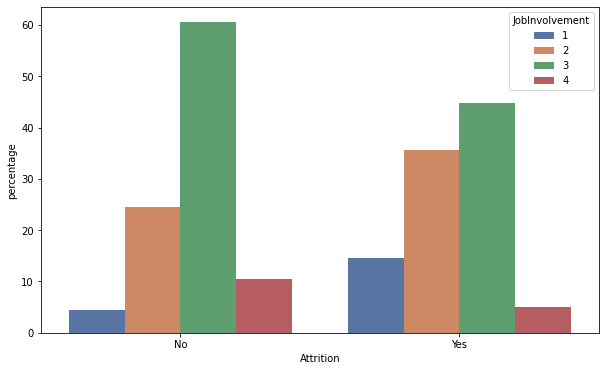

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="JobInvolvement", palette="deep", ax=ax, data = temp)
plt.show()

Os menores níveis de envolvimento com o trabalho subiram naqueles que optaram por sair

In [ ]:
# Envolvimento no trabalho X Idade
df.groupby("JobInvolvement")["Age"].mean()

JobInvolvement
1   35.62
2   36.53
3   37.15
4   36.79
Name: Age, dtype: float64

In [ ]:
# Envolvimento no trabalho X Departamento
df.groupby("JobInvolvement")["Department"].value_counts()

JobInvolvement  Department
1               Maternity      41
                Cardiology     33
                Neurology      22
2               Maternity     216
                Cardiology    133
                Neurology      84
3               Maternity     450
                Cardiology    321
                Neurology     212
4               Maternity      89
                Cardiology     44
                Neurology      31
Name: Department, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pelo envolvimento com o trabalho, e pelo departamento
temp = df.groupby("JobInvolvement")["Department"].value_counts().reset_index(name="Number_Employees")
temp

,JobInvolvement,Department,Number_Employees
0,1,Maternity,41
1,1,Cardiology,33
2,1,Neurology,22
3,2,Maternity,216
4,2,Cardiology,133
5,2,Neurology,84
6,3,Maternity,450
7,3,Cardiology,321
8,3,Neurology,212
9,4,Maternity,89


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,JobInvolvement,Department,Number_Employees,total_employees
0,1,Maternity,41,0
1,1,Cardiology,33,0
2,1,Neurology,22,0
3,2,Maternity,216,0
4,2,Cardiology,133,0
5,2,Neurology,84,0
6,3,Maternity,450,0
7,3,Cardiology,321,0
8,3,Neurology,212,0
9,4,Maternity,89,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["JobInvolvement"] == 1] = df.loc[df["JobInvolvement"] == 1].shape[0]
temp["total_employees"].loc[temp["JobInvolvement"] == 2] = df.loc[df["JobInvolvement"] == 2].shape[0]
temp["total_employees"].loc[temp["JobInvolvement"] == 3] = df.loc[df["JobInvolvement"] == 3].shape[0]
temp["total_employees"].loc[temp["JobInvolvement"] == 4] = df.loc[df["JobInvolvement"] == 4].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,JobInvolvement,Department,Number_Employees,total_employees
0,1,Maternity,41,96
1,1,Cardiology,33,96
2,1,Neurology,22,96
3,2,Maternity,216,433
4,2,Cardiology,133,433
5,2,Neurology,84,433
6,3,Maternity,450,983
7,3,Cardiology,321,983
8,3,Neurology,212,983
9,4,Maternity,89,164


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,JobInvolvement,Department,Number_Employees,total_employees,percentage
0,1,Maternity,41,96,42.71
1,1,Cardiology,33,96,34.38
2,1,Neurology,22,96,22.92
3,2,Maternity,216,433,49.88
4,2,Cardiology,133,433,30.72
5,2,Neurology,84,433,19.40
6,3,Maternity,450,983,45.78
7,3,Cardiology,321,983,32.66
8,3,Neurology,212,983,21.57
9,4,Maternity,89,164,54.27


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["JobInvolvement", "Department", "percentage"]]
temp

,JobInvolvement,Department,percentage
0,1,Maternity,42.71
1,1,Cardiology,34.38
2,1,Neurology,22.92
3,2,Maternity,49.88
4,2,Cardiology,30.72
5,2,Neurology,19.40
6,3,Maternity,45.78
7,3,Cardiology,32.66
8,3,Neurology,21.57
9,4,Maternity,54.27


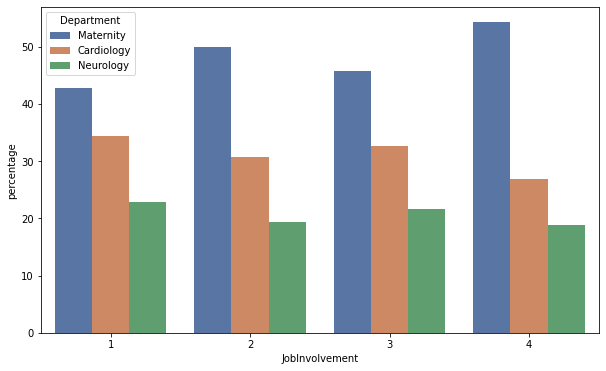

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="JobInvolvement", y = "percentage", hue="Department", palette="deep", ax=ax, data = temp)
plt.show()

Não parece ter muita diferença

In [ ]:
# Envolvimento no trabalho X Gênero
df.groupby("JobInvolvement")["Gender"].value_counts()

JobInvolvement  Gender
1               Male       59
                Female     37
2               Male      246
                Female    187
3               Male      592
                Female    391
4               Male      101
                Female     63
Name: Gender, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pelo envolvimento com o trabalho, e pelo gênero
temp = df.groupby("JobInvolvement")["Gender"].value_counts().reset_index(name="Number_Employees")
temp

,JobInvolvement,Gender,Number_Employees
0,1,Male,59
1,1,Female,37
2,2,Male,246
3,2,Female,187
4,3,Male,592
5,3,Female,391
6,4,Male,101
7,4,Female,63


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,JobInvolvement,Gender,Number_Employees,total_employees
0,1,Male,59,0
1,1,Female,37,0
2,2,Male,246,0
3,2,Female,187,0
4,3,Male,592,0
5,3,Female,391,0
6,4,Male,101,0
7,4,Female,63,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["JobInvolvement"] == 1] = df.loc[df["JobInvolvement"] == 1].shape[0]
temp["total_employees"].loc[temp["JobInvolvement"] == 2] = df.loc[df["JobInvolvement"] == 2].shape[0]
temp["total_employees"].loc[temp["JobInvolvement"] == 3] = df.loc[df["JobInvolvement"] == 3].shape[0]
temp["total_employees"].loc[temp["JobInvolvement"] == 4] = df.loc[df["JobInvolvement"] == 4].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,JobInvolvement,Gender,Number_Employees,total_employees
0,1,Male,59,96
1,1,Female,37,96
2,2,Male,246,433
3,2,Female,187,433
4,3,Male,592,983
5,3,Female,391,983
6,4,Male,101,164
7,4,Female,63,164


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,JobInvolvement,Gender,Number_Employees,total_employees,percentage
0,1,Male,59,96,61.46
1,1,Female,37,96,38.54
2,2,Male,246,433,56.81
3,2,Female,187,433,43.19
4,3,Male,592,983,60.22
5,3,Female,391,983,39.78
6,4,Male,101,164,61.59
7,4,Female,63,164,38.41


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["JobInvolvement", "Gender", "percentage"]]
temp

,JobInvolvement,Gender,percentage
0,1,Male,61.46
1,1,Female,38.54
2,2,Male,56.81
3,2,Female,43.19
4,3,Male,60.22
5,3,Female,39.78
6,4,Male,61.59
7,4,Female,38.41


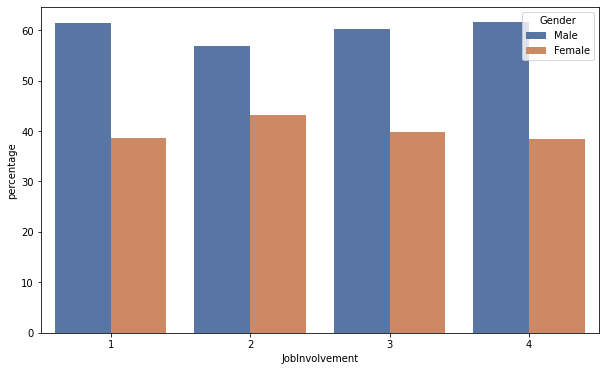

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="JobInvolvement", y = "percentage", hue="Gender", palette="deep", ax=ax, data = temp)
plt.show()

Pequena diferença

In [ ]:
# Envolvimento no trabalho X Quanto recebe por hora
df.groupby("JobInvolvement")["HourlyRate"].mean()

JobInvolvement
1   65.24
2   64.44
3   65.59
4   67.60
Name: HourlyRate, dtype: float64

## JobLevel

In [ ]:
df["JobLevel"].value_counts()

1    621
2    606
3    246
4    122
5     81
Name: JobLevel, dtype: int64

In [ ]:
df["JobLevel"].value_counts() / df.shape[0] * 100

1   37.05
2   36.16
3   14.68
4    7.28
5    4.83
Name: JobLevel, dtype: float64

In [ ]:
df.groupby("Attrition")["JobLevel"].value_counts()

Attrition  JobLevel
No         2           572
           1           479
           3           228
           4           119
           5            79
Yes        1           142
           2            34
           3            18
           4             3
           5             2
Name: JobLevel, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo nível de senioridade
temp = df.groupby("Attrition")["JobLevel"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,JobLevel,Number_Employees
0,No,2,572
1,No,1,479
2,No,3,228
3,No,4,119
4,No,5,79
5,Yes,1,142
6,Yes,2,34
7,Yes,3,18
8,Yes,4,3
9,Yes,5,2


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,JobLevel,Number_Employees,total_employees
0,No,2,572,0
1,No,1,479,0
2,No,3,228,0
3,No,4,119,0
4,No,5,79,0
5,Yes,1,142,0
6,Yes,2,34,0
7,Yes,3,18,0
8,Yes,4,3,0
9,Yes,5,2,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,JobLevel,Number_Employees,total_employees
0,No,2,572,1477
1,No,1,479,1477
2,No,3,228,1477
3,No,4,119,1477
4,No,5,79,1477
5,Yes,1,142,199
6,Yes,2,34,199
7,Yes,3,18,199
8,Yes,4,3,199
9,Yes,5,2,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,JobLevel,Number_Employees,total_employees,percentage
0,No,2,572,1477,38.73
1,No,1,479,1477,32.43
2,No,3,228,1477,15.44
3,No,4,119,1477,8.06
4,No,5,79,1477,5.35
5,Yes,1,142,199,71.36
6,Yes,2,34,199,17.09
7,Yes,3,18,199,9.05
8,Yes,4,3,199,1.51
9,Yes,5,2,199,1.01


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "JobLevel", "percentage"]]
temp

,Attrition,JobLevel,percentage
0,No,2,38.73
1,No,1,32.43
2,No,3,15.44
3,No,4,8.06
4,No,5,5.35
5,Yes,1,71.36
6,Yes,2,17.09
7,Yes,3,9.05
8,Yes,4,1.51
9,Yes,5,1.01


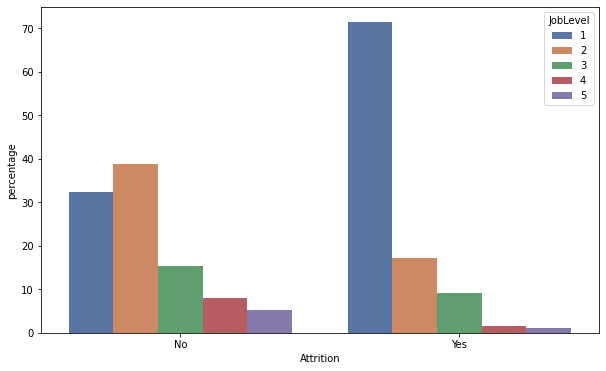

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="JobLevel", palette="deep", ax=ax, data = temp)
plt.show()

Importante diferença ! Aqueles com o menor nível de senioridade, são os que mais optam por sair  

In [ ]:
# Nível de senioridade X Quanto recebe por dia
df.groupby("JobLevel")["DailyRate"].mean()

JobLevel
1   797.99
2   794.82
3   827.34
4   775.05
5   820.25
Name: DailyRate, dtype: float64

O valor por dia não acompanha o nível de senioridade

In [ ]:
# Nível de senioridade X Satisfação com o ambiente
df.groupby("JobLevel")["EnvironmentSatisfaction"].value_counts()

JobLevel  EnvironmentSatisfaction
1         3                          193
          4                          187
          1                          127
          2                          114
2         4                          188
          3                          171
          2                          138
          1                          109
3         3                           89
          4                           63
          1                           51
          2                           43
4         4                           41
          3                           39
          1                           26
          2                           16
5         4                           29
          3                           20
          1                           17
          2                           15
Name: EnvironmentSatisfaction, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pelo nível de senoridade, e pela satisfação com o ambiente 
temp = df.groupby("JobLevel")["EnvironmentSatisfaction"].value_counts().reset_index(name="Number_Employees")
temp

,JobLevel,EnvironmentSatisfaction,Number_Employees
0,1,3,193
1,1,4,187
2,1,1,127
3,1,2,114
4,2,4,188
5,2,3,171
6,2,2,138
7,2,1,109
8,3,3,89
9,3,4,63


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,JobLevel,EnvironmentSatisfaction,Number_Employees,total_employees
0,1,3,193,0
1,1,4,187,0
2,1,1,127,0
3,1,2,114,0
4,2,4,188,0
5,2,3,171,0
6,2,2,138,0
7,2,1,109,0
8,3,3,89,0
9,3,4,63,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["JobLevel"] == 1] = df.loc[df["JobLevel"] == 1].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 2] = df.loc[df["JobLevel"] == 2].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 3] = df.loc[df["JobLevel"] == 3].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 4] = df.loc[df["JobLevel"] == 4].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 5] = df.loc[df["JobLevel"] == 5].shape[0]
temp

,JobLevel,EnvironmentSatisfaction,Number_Employees,total_employees
0,1,3,193,621
1,1,4,187,621
2,1,1,127,621
3,1,2,114,621
4,2,4,188,606
5,2,3,171,606
6,2,2,138,606
7,2,1,109,606
8,3,3,89,246
9,3,4,63,246


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,JobLevel,EnvironmentSatisfaction,Number_Employees,total_employees,percentage
0,1,3,193,621,31.08
1,1,4,187,621,30.11
2,1,1,127,621,20.45
3,1,2,114,621,18.36
4,2,4,188,606,31.02
5,2,3,171,606,28.22
6,2,2,138,606,22.77
7,2,1,109,606,17.99
8,3,3,89,246,36.18
9,3,4,63,246,25.61


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["JobLevel", "EnvironmentSatisfaction", "percentage"]]
temp

,JobLevel,EnvironmentSatisfaction,percentage
0,1,3,31.08
1,1,4,30.11
2,1,1,20.45
3,1,2,18.36
4,2,4,31.02
5,2,3,28.22
6,2,2,22.77
7,2,1,17.99
8,3,3,36.18
9,3,4,25.61


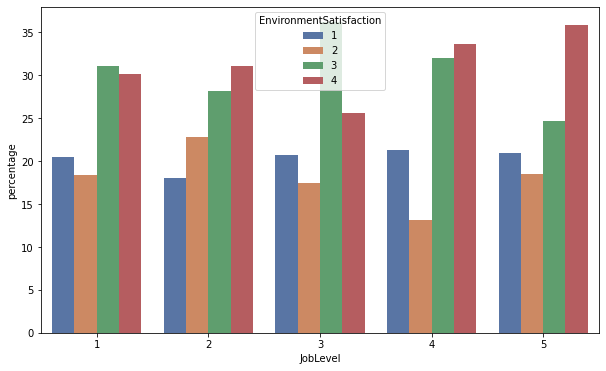

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="JobLevel", y = "percentage", hue="EnvironmentSatisfaction", palette="deep", ax=ax, data = temp)
plt.show()

Não parece ter tanta diferença entre os níveis de senioridade e a satisfação com o ambiente 

In [ ]:
# Nível de senioridade X Gênero
df.groupby("JobLevel")["Gender"].value_counts()

JobLevel  Gender
1         Male      394
          Female    227
2         Male      350
          Female    256
3         Male      139
          Female    107
4         Male       63
          Female     59
5         Male       52
          Female     29
Name: Gender, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pelo nível de senioridade, e pelo gênero
temp = df.groupby("JobLevel")["Gender"].value_counts().reset_index(name="Number_Employees")
temp

,JobLevel,Gender,Number_Employees
0,1,Male,394
1,1,Female,227
2,2,Male,350
3,2,Female,256
4,3,Male,139
5,3,Female,107
6,4,Male,63
7,4,Female,59
8,5,Male,52
9,5,Female,29


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,JobLevel,Gender,Number_Employees,total_employees
0,1,Male,394,0
1,1,Female,227,0
2,2,Male,350,0
3,2,Female,256,0
4,3,Male,139,0
5,3,Female,107,0
6,4,Male,63,0
7,4,Female,59,0
8,5,Male,52,0
9,5,Female,29,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["JobLevel"] == 1] = df.loc[df["JobLevel"] == 1].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 2] = df.loc[df["JobLevel"] == 2].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 3] = df.loc[df["JobLevel"] == 3].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 4] = df.loc[df["JobLevel"] == 4].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 5] = df.loc[df["JobLevel"] == 5].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,JobLevel,Gender,Number_Employees,total_employees
0,1,Male,394,621
1,1,Female,227,621
2,2,Male,350,606
3,2,Female,256,606
4,3,Male,139,246
5,3,Female,107,246
6,4,Male,63,122
7,4,Female,59,122
8,5,Male,52,81
9,5,Female,29,81


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,JobLevel,Gender,Number_Employees,total_employees,percentage
0,1,Male,394,621,63.45
1,1,Female,227,621,36.55
2,2,Male,350,606,57.76
3,2,Female,256,606,42.24
4,3,Male,139,246,56.50
5,3,Female,107,246,43.50
6,4,Male,63,122,51.64
7,4,Female,59,122,48.36
8,5,Male,52,81,64.20
9,5,Female,29,81,35.80


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["JobLevel", "Gender", "percentage"]]
temp

,JobLevel,Gender,percentage
0,1,Male,63.45
1,1,Female,36.55
2,2,Male,57.76
3,2,Female,42.24
4,3,Male,56.50
5,3,Female,43.50
6,4,Male,51.64
7,4,Female,48.36
8,5,Male,64.20
9,5,Female,35.80


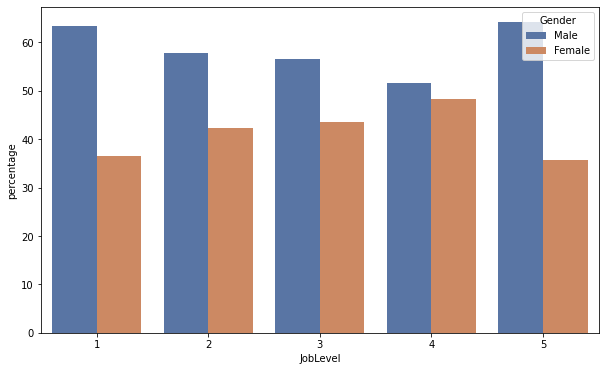

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="JobLevel", y = "percentage", hue="Gender", palette="deep", ax=ax, data = temp)
plt.show()

Temos uma discrepância maior nos extremos

In [ ]:
# Nível de senioridade X Envolvimento com o trabalho 
df.groupby("JobLevel")["JobInvolvement"].value_counts()

JobLevel  JobInvolvement
1         3                 364
          2                 156
          4                  64
          1                  37
2         3                 357
          2                 146
          4                  64
          1                  39
3         3                 142
          2                  77
          4                  16
          1                  11
4         3                  69
          2                  34
          4                  16
          1                   3
5         3                  51
          2                  20
          1                   6
          4                   4
Name: JobInvolvement, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pelo nível de senioridade, e pelo envlvimento com o trabalho
temp = df.groupby("JobLevel")["JobInvolvement"].value_counts().reset_index(name="Number_Employees")
temp

,JobLevel,JobInvolvement,Number_Employees
0,1,3,364
1,1,2,156
2,1,4,64
3,1,1,37
4,2,3,357
5,2,2,146
6,2,4,64
7,2,1,39
8,3,3,142
9,3,2,77


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,JobLevel,JobInvolvement,Number_Employees,total_employees
0,1,3,364,0
1,1,2,156,0
2,1,4,64,0
3,1,1,37,0
4,2,3,357,0
5,2,2,146,0
6,2,4,64,0
7,2,1,39,0
8,3,3,142,0
9,3,2,77,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["JobLevel"] == 1] = df.loc[df["JobLevel"] == 1].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 2] = df.loc[df["JobLevel"] == 2].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 3] = df.loc[df["JobLevel"] == 3].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 4] = df.loc[df["JobLevel"] == 4].shape[0]
temp["total_employees"].loc[temp["JobLevel"] == 5] = df.loc[df["JobLevel"] == 5].shape[0]
temp

,JobLevel,JobInvolvement,Number_Employees,total_employees
0,1,3,364,621
1,1,2,156,621
2,1,4,64,621
3,1,1,37,621
4,2,3,357,606
5,2,2,146,606
6,2,4,64,606
7,2,1,39,606
8,3,3,142,246
9,3,2,77,246


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,JobLevel,JobInvolvement,Number_Employees,total_employees,percentage
0,1,3,364,621,58.62
1,1,2,156,621,25.12
2,1,4,64,621,10.31
3,1,1,37,621,5.96
4,2,3,357,606,58.91
5,2,2,146,606,24.09
6,2,4,64,606,10.56
7,2,1,39,606,6.44
8,3,3,142,246,57.72
9,3,2,77,246,31.30


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["JobLevel", "JobInvolvement", "percentage"]]
temp

,JobLevel,JobInvolvement,percentage
0,1,3,58.62
1,1,2,25.12
2,1,4,10.31
3,1,1,5.96
4,2,3,58.91
5,2,2,24.09
6,2,4,10.56
7,2,1,6.44
8,3,3,57.72
9,3,2,31.30


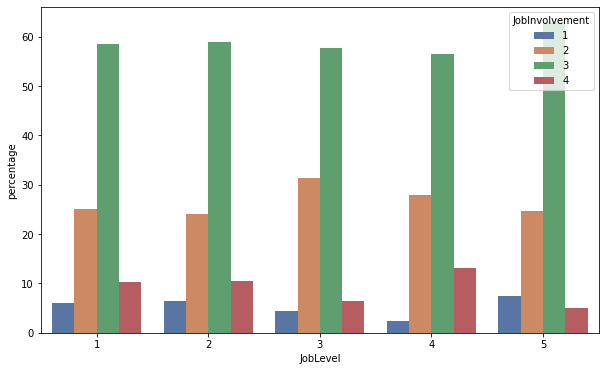

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="JobLevel", y = "percentage", hue="JobInvolvement", palette="deep", ax=ax, data = temp)
plt.show()

Não parece ter muita diferença

## JobRole

In [ ]:
df["JobRole"].value_counts()

Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64

In [ ]:
df["JobRole"].value_counts() / df.shape[0] * 100

Nurse            49.05
Other            31.86
Therapist        11.28
Administrative    6.86
Admin             0.95
Name: JobRole, dtype: float64

Na feature engineering, agrupar Administrative e Admin na mesma categoria

In [ ]:
df.groupby("Attrition")["JobRole"].value_counts()

Attrition  JobRole       
No         Nurse             715
           Other             447
           Therapist         185
           Administrative    114
           Admin              16
Yes        Nurse             107
           Other              87
           Therapist           4
           Administrative      1
Name: JobRole, dtype: int64

In [ ]:
# Criar uma cópia do DataFrame só para fazer a análise agrupando os admin com administrative
df_temp = df

In [ ]:
# Alterando para "Administrative" aqueles escritos "Admin"
df_temp["JobRole"].loc[df["JobRole"] == "Admin"] = "Administrative"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_temp["JobRole"].value_counts()

Nurse             822
Other             534
Therapist         189
Administrative    131
Name: JobRole, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pela função no trabalho 
temp = df_temp.groupby("Attrition")["JobRole"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,JobRole,Number_Employees
0,No,Nurse,715
1,No,Other,447
2,No,Therapist,185
3,No,Administrative,130
4,Yes,Nurse,107
5,Yes,Other,87
6,Yes,Therapist,4
7,Yes,Administrative,1


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,JobRole,Number_Employees,total_employees
0,No,Nurse,715,0
1,No,Other,447,0
2,No,Therapist,185,0
3,No,Administrative,130,0
4,Yes,Nurse,107,0
5,Yes,Other,87,0
6,Yes,Therapist,4,0
7,Yes,Administrative,1,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,JobRole,Number_Employees,total_employees
0,No,Nurse,715,1477
1,No,Other,447,1477
2,No,Therapist,185,1477
3,No,Administrative,130,1477
4,Yes,Nurse,107,199
5,Yes,Other,87,199
6,Yes,Therapist,4,199
7,Yes,Administrative,1,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,JobRole,Number_Employees,total_employees,percentage
0,No,Nurse,715,1477,48.41
1,No,Other,447,1477,30.26
2,No,Therapist,185,1477,12.53
3,No,Administrative,130,1477,8.80
4,Yes,Nurse,107,199,53.77
5,Yes,Other,87,199,43.72
6,Yes,Therapist,4,199,2.01
7,Yes,Administrative,1,199,0.50


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "JobRole", "percentage"]]
temp

,Attrition,JobRole,percentage
0,No,Nurse,48.41
1,No,Other,30.26
2,No,Therapist,12.53
3,No,Administrative,8.80
4,Yes,Nurse,53.77
5,Yes,Other,43.72
6,Yes,Therapist,2.01
7,Yes,Administrative,0.50


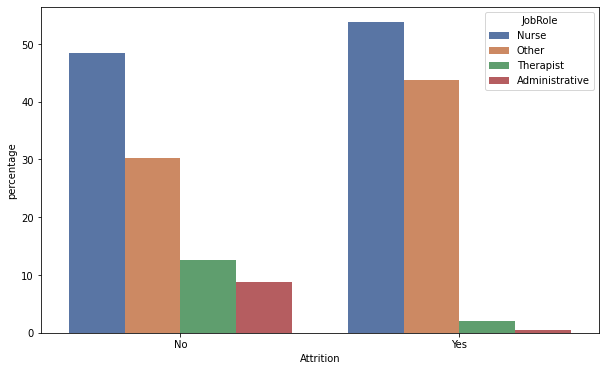

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="JobRole", palette="deep", ax=ax, data = temp)
plt.show()

A diferença mais importante foram com os de cargo administratico e os terapeutas que tendem a optar menos por sair

In [ ]:
# Função no Trabalho X Satisfação com o ambiente
df.groupby("JobRole")["EnvironmentSatisfaction"].value_counts()

JobRole         EnvironmentSatisfaction
Administrative  4                           42
                3                           36
                1                           30
                2                           23
Nurse           4                          248
                3                          247
                1                          168
                2                          159
Other           3                          171
                4                          150
                2                          109
                1                          104
Therapist       4                           68
                3                           58
                2                           35
                1                           28
Name: EnvironmentSatisfaction, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pela função no trabalho 
temp = df_temp.groupby("JobRole")["EnvironmentSatisfaction"].value_counts().reset_index(name="Number_Employees")
temp

,JobRole,EnvironmentSatisfaction,Number_Employees
0,Administrative,4,42
1,Administrative,3,36
2,Administrative,1,30
3,Administrative,2,23
4,Nurse,4,248
5,Nurse,3,247
6,Nurse,1,168
7,Nurse,2,159
8,Other,3,171
9,Other,4,150


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,JobRole,EnvironmentSatisfaction,Number_Employees,total_employees
0,Administrative,4,42,0
1,Administrative,3,36,0
2,Administrative,1,30,0
3,Administrative,2,23,0
4,Nurse,4,248,0
5,Nurse,3,247,0
6,Nurse,1,168,0
7,Nurse,2,159,0
8,Other,3,171,0
9,Other,4,150,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["JobRole"] == "Administrative"] = df.loc[df["JobRole"] == "Administrative"].shape[0]
temp["total_employees"].loc[temp["JobRole"] == "Nurse"] = df.loc[df["JobRole"] == "Nurse"].shape[0]
temp["total_employees"].loc[temp["JobRole"] == "Other"] = df.loc[df["JobRole"] == "Other"].shape[0]
temp["total_employees"].loc[temp["JobRole"] == "Therapist"] = df.loc[df["JobRole"] == "Therapist"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,JobRole,EnvironmentSatisfaction,Number_Employees,total_employees
0,Administrative,4,42,131
1,Administrative,3,36,131
2,Administrative,1,30,131
3,Administrative,2,23,131
4,Nurse,4,248,822
5,Nurse,3,247,822
6,Nurse,1,168,822
7,Nurse,2,159,822
8,Other,3,171,534
9,Other,4,150,534


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,JobRole,EnvironmentSatisfaction,Number_Employees,total_employees,percentage
0,Administrative,4,42,131,32.06
1,Administrative,3,36,131,27.48
2,Administrative,1,30,131,22.90
3,Administrative,2,23,131,17.56
4,Nurse,4,248,822,30.17
5,Nurse,3,247,822,30.05
6,Nurse,1,168,822,20.44
7,Nurse,2,159,822,19.34
8,Other,3,171,534,32.02
9,Other,4,150,534,28.09


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["JobRole", "EnvironmentSatisfaction", "percentage"]]
temp

,JobRole,EnvironmentSatisfaction,percentage
0,Administrative,4,32.06
1,Administrative,3,27.48
2,Administrative,1,22.90
3,Administrative,2,17.56
4,Nurse,4,30.17
5,Nurse,3,30.05
6,Nurse,1,20.44
7,Nurse,2,19.34
8,Other,3,32.02
9,Other,4,28.09


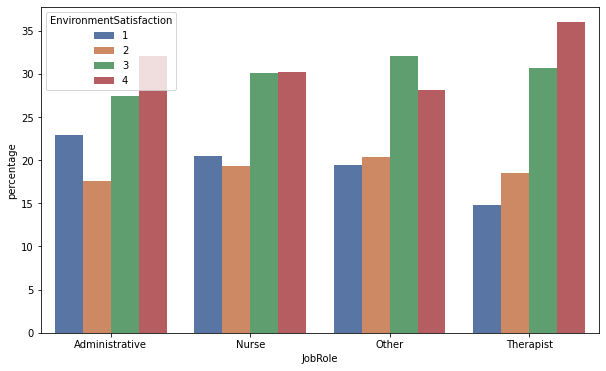

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="JobRole", y = "percentage", hue="EnvironmentSatisfaction", palette="deep", ax=ax, data = temp)
plt.show()

## JobSatisfaction

In [ ]:
df["JobSatisfaction"].value_counts()

4    530
3    507
1    329
2    310
Name: JobSatisfaction, dtype: int64

In [ ]:
df["JobSatisfaction"].value_counts() / df.shape[0] * 100

4   31.62
3   30.25
1   19.63
2   18.50
Name: JobSatisfaction, dtype: float64

In [ ]:
df.groupby("Attrition")["JobSatisfaction"].value_counts() 

Attrition  JobSatisfaction
No         4                  485
           3                  447
           1                  277
           2                  268
Yes        3                   60
           1                   52
           4                   45
           2                   42
Name: JobSatisfaction, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pela satisfação no trabalho
temp = df_temp.groupby("Attrition")["JobSatisfaction"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,JobSatisfaction,Number_Employees
0,No,4,485
1,No,3,447
2,No,1,277
3,No,2,268
4,Yes,3,60
5,Yes,1,52
6,Yes,4,45
7,Yes,2,42


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,JobSatisfaction,Number_Employees,total_employees
0,No,4,485,0
1,No,3,447,0
2,No,1,277,0
3,No,2,268,0
4,Yes,3,60,0
5,Yes,1,52,0
6,Yes,4,45,0
7,Yes,2,42,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,JobSatisfaction,Number_Employees,total_employees
0,No,4,485,1477
1,No,3,447,1477
2,No,1,277,1477
3,No,2,268,1477
4,Yes,3,60,199
5,Yes,1,52,199
6,Yes,4,45,199
7,Yes,2,42,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,JobSatisfaction,Number_Employees,total_employees,percentage
0,No,4,485,1477,32.84
1,No,3,447,1477,30.26
2,No,1,277,1477,18.75
3,No,2,268,1477,18.14
4,Yes,3,60,199,30.15
5,Yes,1,52,199,26.13
6,Yes,4,45,199,22.61
7,Yes,2,42,199,21.11


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "JobSatisfaction", "percentage"]]
temp

,Attrition,JobSatisfaction,percentage
0,No,4,32.84
1,No,3,30.26
2,No,1,18.75
3,No,2,18.14
4,Yes,3,30.15
5,Yes,1,26.13
6,Yes,4,22.61
7,Yes,2,21.11


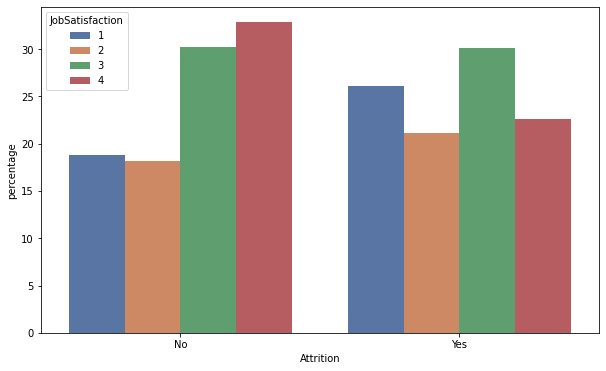

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="JobSatisfaction", palette="deep", ax=ax, data = temp)
plt.show()

A diferença maior foi nos extremos 

## MaritalStatus

In [ ]:
df["MaritalStatus"].value_counts()

Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64

In [ ]:
df["MaritalStatus"].value_counts() / df.shape[0] * 100

Married    46.36
Single     31.15
Divorced   22.49
Name: MaritalStatus, dtype: float64

In [ ]:
df.groupby("Attrition")["MaritalStatus"].value_counts()

Attrition  MaritalStatus
No         Married          716
           Single           408
           Divorced         353
Yes        Single           114
           Married           61
           Divorced          24
Name: MaritalStatus, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo Estado Civil 
temp = df_temp.groupby("Attrition")["MaritalStatus"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,MaritalStatus,Number_Employees
0,No,Married,716
1,No,Single,408
2,No,Divorced,353
3,Yes,Single,114
4,Yes,Married,61
5,Yes,Divorced,24


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,MaritalStatus,Number_Employees,total_employees
0,No,Married,716,0
1,No,Single,408,0
2,No,Divorced,353,0
3,Yes,Single,114,0
4,Yes,Married,61,0
5,Yes,Divorced,24,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,MaritalStatus,Number_Employees,total_employees
0,No,Married,716,1477
1,No,Single,408,1477
2,No,Divorced,353,1477
3,Yes,Single,114,199
4,Yes,Married,61,199
5,Yes,Divorced,24,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,MaritalStatus,Number_Employees,total_employees,percentage
0,No,Married,716,1477,48.48
1,No,Single,408,1477,27.62
2,No,Divorced,353,1477,23.90
3,Yes,Single,114,199,57.29
4,Yes,Married,61,199,30.65
5,Yes,Divorced,24,199,12.06


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "MaritalStatus", "percentage"]]
temp

,Attrition,MaritalStatus,percentage
0,No,Married,48.48
1,No,Single,27.62
2,No,Divorced,23.90
3,Yes,Single,57.29
4,Yes,Married,30.65
5,Yes,Divorced,12.06


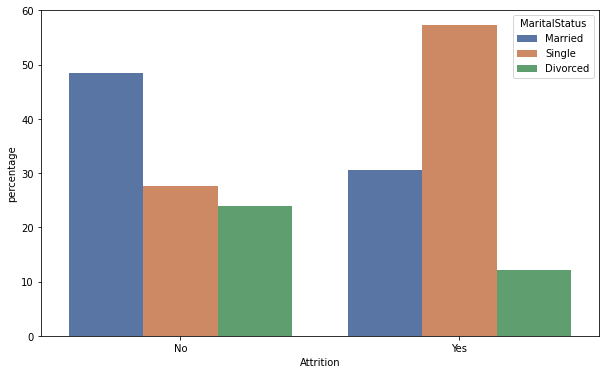

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="MaritalStatus", palette="deep", ax=ax, data = temp)
plt.show()

Grande diferença! Pessoas solteiras são as que mais optam por sair. Será devido a maior liberdade ? 

## MonthlyIncome

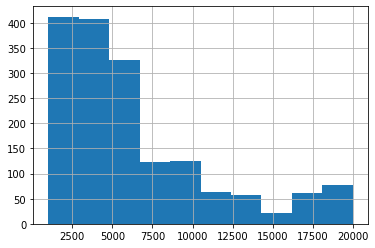

In [ ]:
df["MonthlyIncome"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


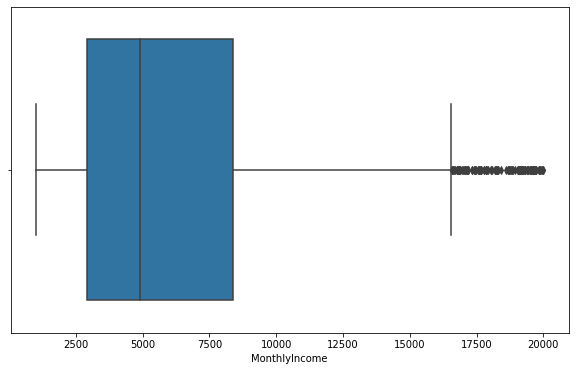

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df["MonthlyIncome"])
fig.show()

Temos aqui alguns outliers

Por conta desses outliers, irei utilizar a mediana ao invés da média

In [ ]:
df["MonthlyIncome"].mean()

6516.512529832936

In [ ]:
df["MonthlyIncome"].median()

4899.0

In [ ]:
df.groupby("Attrition")["MonthlyIncome"].median()

Attrition
No    5204.00
Yes   2741.00
Name: MonthlyIncome, dtype: float64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pela renda mensal 
temp = df_temp.groupby("Attrition")["MonthlyIncome"].median().reset_index(name="Median_MonthlyIncome")
temp

,Attrition,Median_MonthlyIncome
0,No,5204.00
1,Yes,2741.00


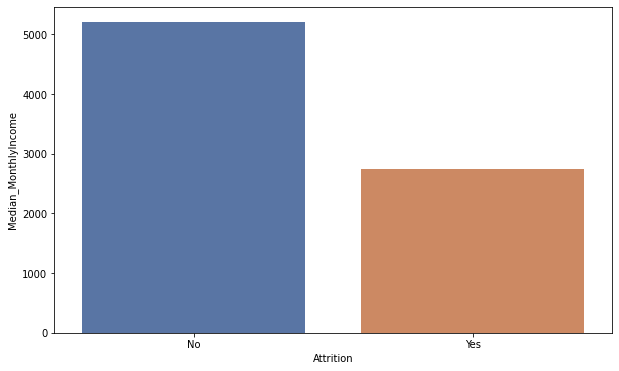

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "Median_MonthlyIncome", palette="deep", ax=ax, data = temp)
plt.show()

Diferença importante da renda mensal entre aqueles que optaram por sair

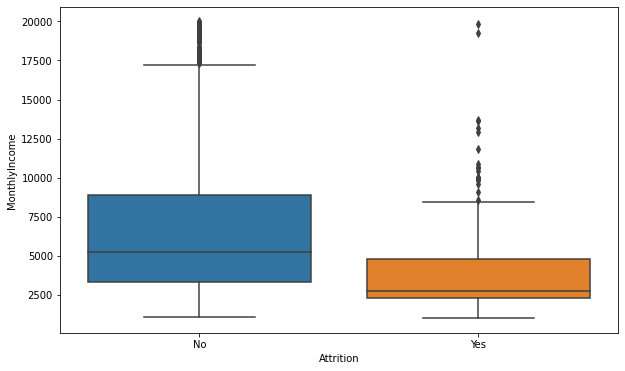

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, y="MonthlyIncome", x="Attrition")
fig.show()

## MonthlyRate

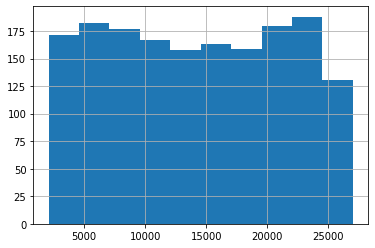

In [ ]:
df["MonthlyRate"].hist()

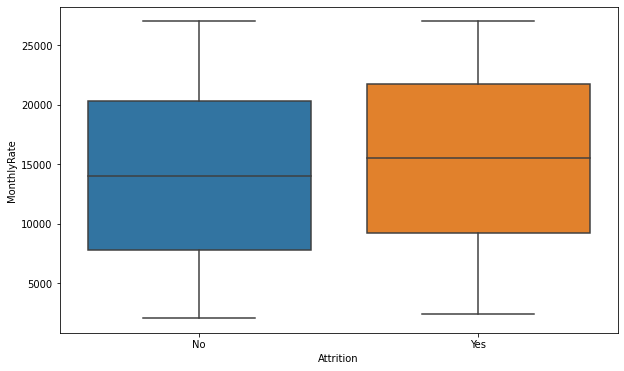

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, y="MonthlyRate", x="Attrition")
fig.show()

In [ ]:
df.groupby("Attrition")["MonthlyRate"].mean()

Attrition
No    14167.19
Yes   15176.43
Name: MonthlyRate, dtype: float64

## NumCompaniesWorked

In [ ]:
df["NumCompaniesWorked"].value_counts()

1    601
0    223
3    180
2    173
4    156
7     84
6     79
5     70
9     59
8     51
Name: NumCompaniesWorked, dtype: int64

In [ ]:
df.groupby("Attrition")["NumCompaniesWorked"].mean()

Attrition
No    2.65
Yes   2.78
Name: NumCompaniesWorked, dtype: float64

In [ ]:
df.groupby("Attrition")["NumCompaniesWorked"].value_counts()

Attrition  NumCompaniesWorked
No         1                     508
           0                     203
           3                     170
           2                     163
           4                     145
           7                      68
           6                      64
           5                      58
           9                      51
           8                      47
Yes        1                      93
           0                      20
           7                      16
           6                      15
           5                      12
           4                      11
           2                      10
           3                      10
           9                       8
           8                       4
Name: NumCompaniesWorked, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo número de empresas em que já trabalhou
temp = df_temp.groupby("Attrition")["NumCompaniesWorked"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,NumCompaniesWorked,Number_Employees
0,No,1,508
1,No,0,203
2,No,3,170
3,No,2,163
4,No,4,145
5,No,7,68
6,No,6,64
7,No,5,58
8,No,9,51
9,No,8,47


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,NumCompaniesWorked,Number_Employees,total_employees
0,No,1,508,0
1,No,0,203,0
2,No,3,170,0
3,No,2,163,0
4,No,4,145,0
5,No,7,68,0
6,No,6,64,0
7,No,5,58,0
8,No,9,51,0
9,No,8,47,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,NumCompaniesWorked,Number_Employees,total_employees
0,No,1,508,1477
1,No,0,203,1477
2,No,3,170,1477
3,No,2,163,1477
4,No,4,145,1477
5,No,7,68,1477
6,No,6,64,1477
7,No,5,58,1477
8,No,9,51,1477
9,No,8,47,1477


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,NumCompaniesWorked,Number_Employees,total_employees,percentage
0,No,1,508,1477,34.39
1,No,0,203,1477,13.74
2,No,3,170,1477,11.51
3,No,2,163,1477,11.04
4,No,4,145,1477,9.82
5,No,7,68,1477,4.60
6,No,6,64,1477,4.33
7,No,5,58,1477,3.93
8,No,9,51,1477,3.45
9,No,8,47,1477,3.18


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "NumCompaniesWorked", "percentage"]]
temp

,Attrition,NumCompaniesWorked,percentage
0,No,1,34.39
1,No,0,13.74
2,No,3,11.51
3,No,2,11.04
4,No,4,9.82
5,No,7,4.60
6,No,6,4.33
7,No,5,3.93
8,No,9,3.45
9,No,8,3.18


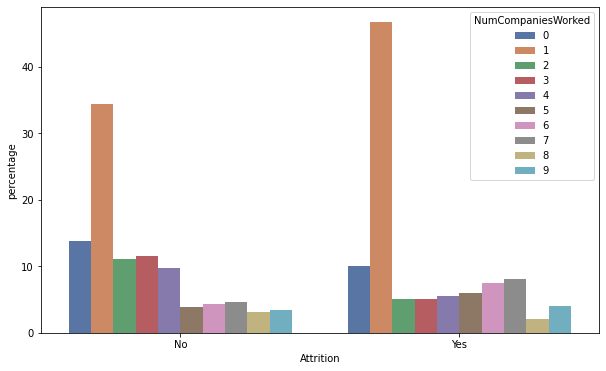

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="NumCompaniesWorked", palette="deep", ax=ax, data = temp)
plt.show()

## Over18

Não sei se faz sentido essa variável, porque na análise da idade, todos eram maior ou igual a 18 anos

In [ ]:
df["Over18"].value_counts()

Y    1676
Name: Over18, dtype: int64

## OverTime

In [ ]:
df["OverTime"].value_counts()

No     1200
Yes     476
Name: OverTime, dtype: int64

In [ ]:
df["OverTime"].value_counts() / df.shape[0] * 100

No    71.60
Yes   28.40
Name: OverTime, dtype: float64

In [ ]:
df.groupby("Attrition")["OverTime"].value_counts() 

Attrition  OverTime
No         No          1140
           Yes          337
Yes        Yes          139
           No            60
Name: OverTime, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e se faz hora extra ou não
temp = df_temp.groupby("Attrition")["OverTime"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,OverTime,Number_Employees
0,No,No,1140
1,No,Yes,337
2,Yes,Yes,139
3,Yes,No,60


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,OverTime,Number_Employees,total_employees
0,No,No,1140,0
1,No,Yes,337,0
2,Yes,Yes,139,0
3,Yes,No,60,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,OverTime,Number_Employees,total_employees
0,No,No,1140,1477
1,No,Yes,337,1477
2,Yes,Yes,139,199
3,Yes,No,60,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,OverTime,Number_Employees,total_employees,percentage
0,No,No,1140,1477,77.18
1,No,Yes,337,1477,22.82
2,Yes,Yes,139,199,69.85
3,Yes,No,60,199,30.15


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "OverTime", "percentage"]]
temp

,Attrition,OverTime,percentage
0,No,No,77.18
1,No,Yes,22.82
2,Yes,Yes,69.85
3,Yes,No,30.15


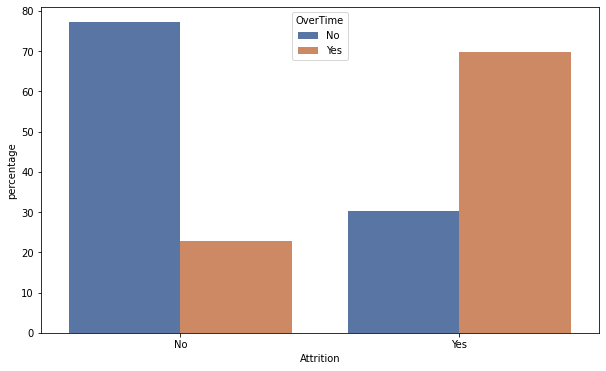

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="OverTime", palette="deep", ax=ax, data = temp)
plt.show()

Claramente uma inversão. Aqueles que optaram por sair, fazer mais hora extra, não em sentindo de quantidade de horas, mas sim em quantidade de pessoas que fazem

## PercentSalaryHike

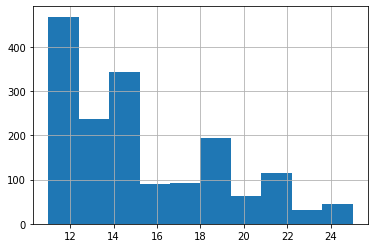

In [ ]:
df["PercentSalaryHike"].hist()

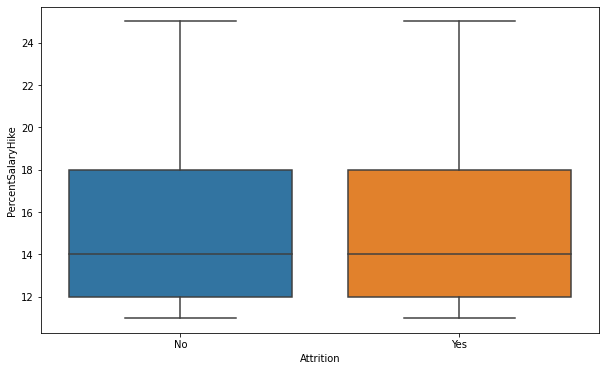

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, y="PercentSalaryHike", x="Attrition")
fig.show()

In [ ]:
df.groupby("Attrition")["PercentSalaryHike"].mean()

Attrition
No    15.19
Yes   15.23
Name: PercentSalaryHike, dtype: float64

## PerformanceRating

In [ ]:
df["PerformanceRating"].value_counts()

3    1424
4     252
Name: PerformanceRating, dtype: int64

In [ ]:
df["PerformanceRating"].value_counts() / df.shape[0] * 100

3   84.96
4   15.04
Name: PerformanceRating, dtype: float64

In [ ]:
df.groupby("Attrition")["PerformanceRating"].value_counts() 

Attrition  PerformanceRating
No         3                    1257
           4                     220
Yes        3                     167
           4                      32
Name: PerformanceRating, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pela avalaiação de desempenho
temp = df_temp.groupby("Attrition")["PerformanceRating"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,PerformanceRating,Number_Employees
0,No,3,1257
1,No,4,220
2,Yes,3,167
3,Yes,4,32


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,PerformanceRating,Number_Employees,total_employees
0,No,3,1257,0
1,No,4,220,0
2,Yes,3,167,0
3,Yes,4,32,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,PerformanceRating,Number_Employees,total_employees
0,No,3,1257,1477
1,No,4,220,1477
2,Yes,3,167,199
3,Yes,4,32,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,PerformanceRating,Number_Employees,total_employees,percentage
0,No,3,1257,1477,85.10
1,No,4,220,1477,14.90
2,Yes,3,167,199,83.92
3,Yes,4,32,199,16.08


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "PerformanceRating", "percentage"]]
temp

,Attrition,PerformanceRating,percentage
0,No,3,85.10
1,No,4,14.90
2,Yes,3,83.92
3,Yes,4,16.08


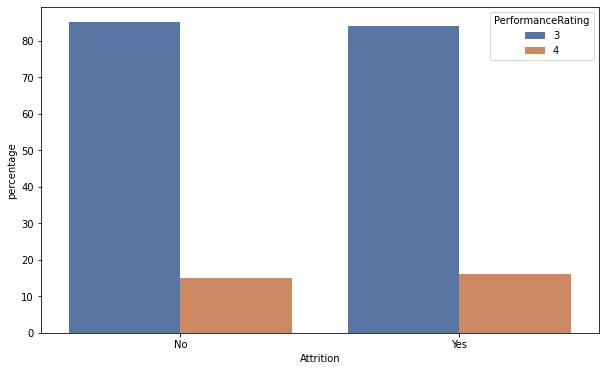

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="PerformanceRating", palette="deep", ax=ax, data = temp)
plt.show()

Sem diferença

## RelationshipSatisfaction

In [ ]:
df["RelationshipSatisfaction"].value_counts()

3    526
4    494
2    346
1    310
Name: RelationshipSatisfaction, dtype: int64

In [ ]:
df["RelationshipSatisfaction"].value_counts() / df.shape[0] * 100

3   31.38
4   29.47
2   20.64
1   18.50
Name: RelationshipSatisfaction, dtype: float64

In [ ]:
df.groupby("Attrition")["RelationshipSatisfaction"].value_counts()

Attrition  RelationshipSatisfaction
No         3                           459
           4                           442
           2                           306
           1                           270
Yes        3                            67
           4                            52
           1                            40
           2                            40
Name: RelationshipSatisfaction, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pela satisfação com o relacionamento
temp = df_temp.groupby("Attrition")["RelationshipSatisfaction"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,RelationshipSatisfaction,Number_Employees
0,No,3,459
1,No,4,442
2,No,2,306
3,No,1,270
4,Yes,3,67
5,Yes,4,52
6,Yes,1,40
7,Yes,2,40


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,RelationshipSatisfaction,Number_Employees,total_employees
0,No,3,459,0
1,No,4,442,0
2,No,2,306,0
3,No,1,270,0
4,Yes,3,67,0
5,Yes,4,52,0
6,Yes,1,40,0
7,Yes,2,40,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,RelationshipSatisfaction,Number_Employees,total_employees
0,No,3,459,1477
1,No,4,442,1477
2,No,2,306,1477
3,No,1,270,1477
4,Yes,3,67,199
5,Yes,4,52,199
6,Yes,1,40,199
7,Yes,2,40,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,RelationshipSatisfaction,Number_Employees,total_employees,percentage
0,No,3,459,1477,31.08
1,No,4,442,1477,29.93
2,No,2,306,1477,20.72
3,No,1,270,1477,18.28
4,Yes,3,67,199,33.67
5,Yes,4,52,199,26.13
6,Yes,1,40,199,20.10
7,Yes,2,40,199,20.10


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "RelationshipSatisfaction", "percentage"]]
temp

,Attrition,RelationshipSatisfaction,percentage
0,No,3,31.08
1,No,4,29.93
2,No,2,20.72
3,No,1,18.28
4,Yes,3,33.67
5,Yes,4,26.13
6,Yes,1,20.10
7,Yes,2,20.10


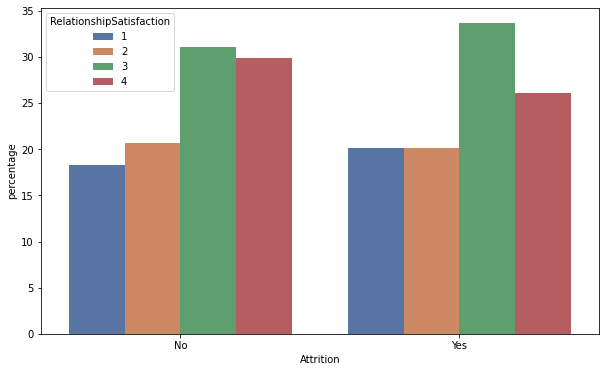

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="RelationshipSatisfaction", palette="deep", ax=ax, data = temp)
plt.show()

Sem diferença significativa

## StandardHours

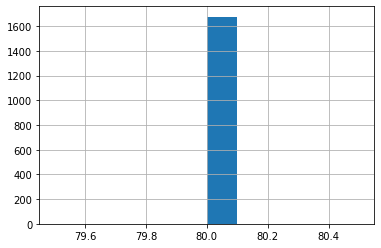

In [ ]:
df["StandardHours"].hist()

In [ ]:
df["StandardHours"].value_counts()

80    1676
Name: StandardHours, dtype: int64

Igual para todos, pode ser retirada do dataset

## Shift

0 - Manhã / 1 - Tarde / 2 - Noite / 3 - Madrugada ??? 

In [ ]:
df["Shift"].value_counts()

0    708
1    684
2    185
3     99
Name: Shift, dtype: int64

In [ ]:
df["Shift"].value_counts() / df.shape[0] * 100

0   42.24
1   40.81
2   11.04
3    5.91
Name: Shift, dtype: float64

In [ ]:
df.groupby("Attrition")["Shift"].value_counts() 

Attrition  Shift
No         1        642
           0        568
           2        179
           3         88
Yes        0        140
           1         42
           3         11
           2          6
Name: Shift, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo turno de trabalho
temp = df_temp.groupby("Attrition")["Shift"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,Shift,Number_Employees
0,No,1,642
1,No,0,568
2,No,2,179
3,No,3,88
4,Yes,0,140
5,Yes,1,42
6,Yes,3,11
7,Yes,2,6


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,Shift,Number_Employees,total_employees
0,No,1,642,0
1,No,0,568,0
2,No,2,179,0
3,No,3,88,0
4,Yes,0,140,0
5,Yes,1,42,0
6,Yes,3,11,0
7,Yes,2,6,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,Shift,Number_Employees,total_employees
0,No,1,642,1477
1,No,0,568,1477
2,No,2,179,1477
3,No,3,88,1477
4,Yes,0,140,199
5,Yes,1,42,199
6,Yes,3,11,199
7,Yes,2,6,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,Shift,Number_Employees,total_employees,percentage
0,No,1,642,1477,43.47
1,No,0,568,1477,38.46
2,No,2,179,1477,12.12
3,No,3,88,1477,5.96
4,Yes,0,140,199,70.35
5,Yes,1,42,199,21.11
6,Yes,3,11,199,5.53
7,Yes,2,6,199,3.02


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "Shift", "percentage"]]
temp

,Attrition,Shift,percentage
0,No,1,43.47
1,No,0,38.46
2,No,2,12.12
3,No,3,5.96
4,Yes,0,70.35
5,Yes,1,21.11
6,Yes,3,5.53
7,Yes,2,3.02


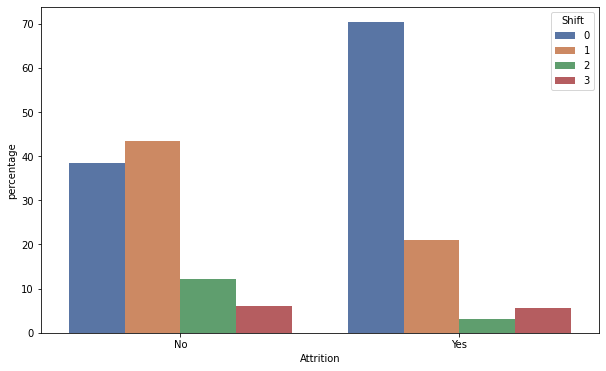

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="Shift", palette="deep", ax=ax, data = temp)
plt.show()

Parece ter uma predominância importante do turno = 0 naqueles que optaram por sair. O problema é saber o que o 0 significa

## TotalWorkingYears

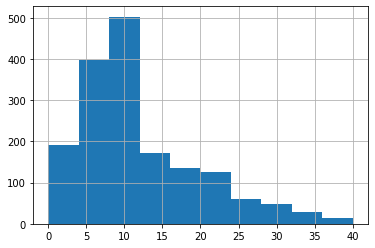

In [ ]:
df["TotalWorkingYears"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


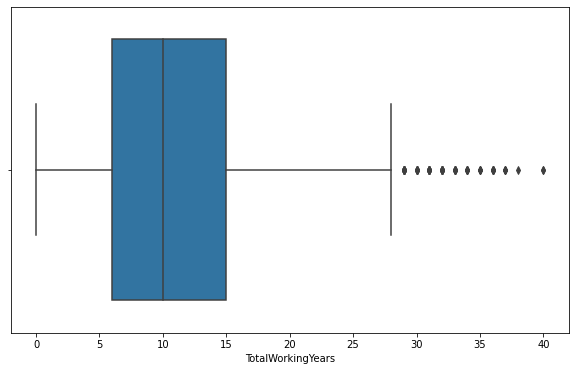

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df["TotalWorkingYears"])
fig.show()

Temos alguns outliers

In [ ]:
df.groupby("Attrition")["TotalWorkingYears"].median()

Attrition
No    10.00
Yes    5.00
Name: TotalWorkingYears, dtype: float64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo total de anos trabalhando
temp = df_temp.groupby("Attrition")["TotalWorkingYears"].median().reset_index(name="Median_WorkingYears")
temp

,Attrition,Median_WorkingYears
0,No,10.00
1,Yes,5.00


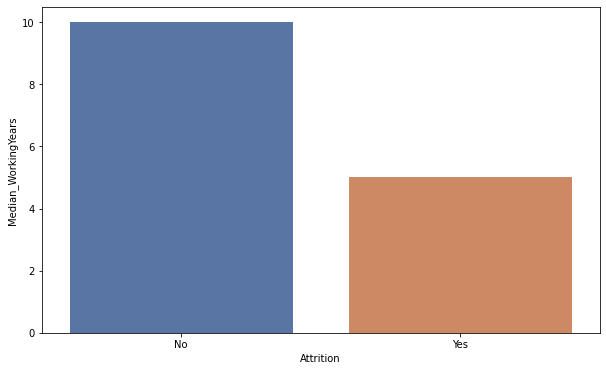

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "Median_WorkingYears", palette="deep", ax=ax, data = temp)
plt.show()

Pessoas que optaram a sair gerlamente são as que menos trabalharam no total em anos 

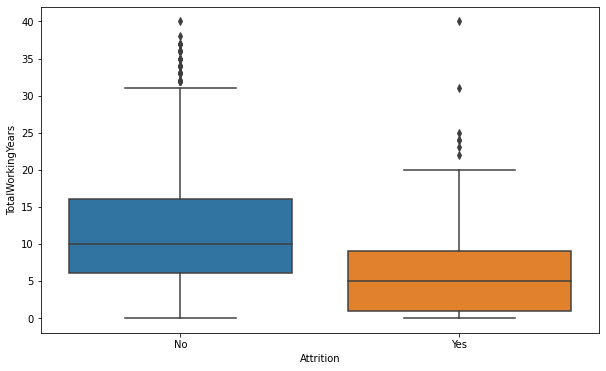

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, y="TotalWorkingYears", x="Attrition")
fig.show()



## TrainingTimesLastYear

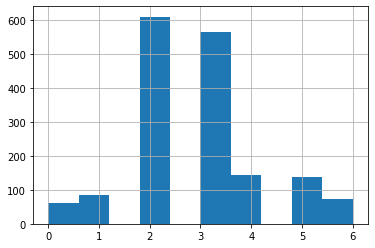

In [ ]:
df["TrainingTimesLastYear"].hist()

In [ ]:
df["TrainingTimesLastYear"].value_counts()

Poucos outliers

In [ ]:
df.groupby("Attrition")["TrainingTimesLastYear"].value_counts()

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo tempo de treinamento no ultimo ano 
temp = df_temp.groupby("Attrition")["TrainingTimesLastYear"].value_counts().reset_index(name="Number_Employees")
temp

In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,TrainingTimesLastYear,Number_Employees,total_employees
0,No,2,519,1477
1,No,3,516,1477
2,No,4,125,1477
3,No,5,123,1477
4,No,1,79,1477
5,No,6,67,1477
6,No,0,48,1477
7,Yes,2,92,199
8,Yes,3,51,199
9,Yes,4,18,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,TrainingTimesLastYear,Number_Employees,total_employees,percentage
0,No,2,519,1477,35.14
1,No,3,516,1477,34.94
2,No,4,125,1477,8.46
3,No,5,123,1477,8.33
4,No,1,79,1477,5.35
5,No,6,67,1477,4.54
6,No,0,48,1477,3.25
7,Yes,2,92,199,46.23
8,Yes,3,51,199,25.63
9,Yes,4,18,199,9.05


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "TrainingTimesLastYear", "percentage"]]
temp

,Attrition,TrainingTimesLastYear,percentage
0,No,2,35.14
1,No,3,34.94
2,No,4,8.46
3,No,5,8.33
4,No,1,5.35
5,No,6,4.54
6,No,0,3.25
7,Yes,2,46.23
8,Yes,3,25.63
9,Yes,4,9.05


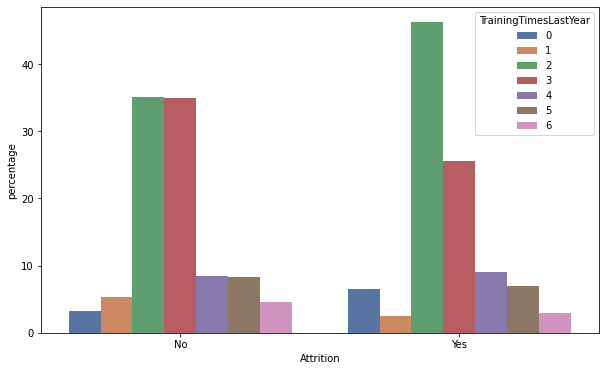

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="TrainingTimesLastYear", palette="deep", ax=ax, data = temp)
plt.show()

## WorkLifeBalance

In [ ]:
df["WorkLifeBalance"].value_counts()

3    1028
2     385
4     173
1      90
Name: WorkLifeBalance, dtype: int64

In [ ]:
df["WorkLifeBalance"].value_counts() / df.shape[0] * 100

3   61.34
2   22.97
4   10.32
1    5.37
Name: WorkLifeBalance, dtype: float64

In [ ]:
df.groupby("Attrition")["WorkLifeBalance"].value_counts()

Attrition  WorkLifeBalance
No         3                  928
           2                  331
           4                  152
           1                   66
Yes        3                  100
           2                   54
           1                   24
           4                   21
Name: WorkLifeBalance, dtype: int64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo Equilíbrio da vida pessoal com a profissional 
temp = df_temp.groupby("Attrition")["WorkLifeBalance"].value_counts().reset_index(name="Number_Employees")
temp

,Attrition,WorkLifeBalance,Number_Employees
0,No,3,928
1,No,2,331
2,No,4,152
3,No,1,66
4,Yes,3,100
5,Yes,2,54
6,Yes,1,24
7,Yes,4,21


In [ ]:
# Criando nova coluna para o somatório de todas as pessoas agrupadas pela decisão de ter saído ou não 
temp["total_employees"] = 0
temp

,Attrition,WorkLifeBalance,Number_Employees,total_employees
0,No,3,928,0
1,No,2,331,0
2,No,4,152,0
3,No,1,66,0
4,Yes,3,100,0
5,Yes,2,54,0
6,Yes,1,24,0
7,Yes,4,21,0


In [ ]:
# Colocando os valores corretos na coluna recém criada
temp["total_employees"].loc[temp["Attrition"] == "No"] = df.loc[df["Attrition"] == "No"].shape[0]
temp["total_employees"].loc[temp["Attrition"] == "Yes"] = df.loc[df["Attrition"] == "Yes"].shape[0]
temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Attrition,WorkLifeBalance,Number_Employees,total_employees
0,No,3,928,1477
1,No,2,331,1477
2,No,4,152,1477
3,No,1,66,1477
4,Yes,3,100,199
5,Yes,2,54,199
6,Yes,1,24,199
7,Yes,4,21,199


In [ ]:
# Criando nova coluna com a porcentagem
temp["percentage"] = temp["Number_Employees"] / temp["total_employees"] * 100
temp

,Attrition,WorkLifeBalance,Number_Employees,total_employees,percentage
0,No,3,928,1477,62.83
1,No,2,331,1477,22.41
2,No,4,152,1477,10.29
3,No,1,66,1477,4.47
4,Yes,3,100,199,50.25
5,Yes,2,54,199,27.14
6,Yes,1,24,199,12.06
7,Yes,4,21,199,10.55


In [ ]:
# Selecionando apenas as colunas desejadas
temp = temp[["Attrition", "WorkLifeBalance", "percentage"]]
temp

,Attrition,WorkLifeBalance,percentage
0,No,3,62.83
1,No,2,22.41
2,No,4,10.29
3,No,1,4.47
4,Yes,3,50.25
5,Yes,2,27.14
6,Yes,1,12.06
7,Yes,4,10.55


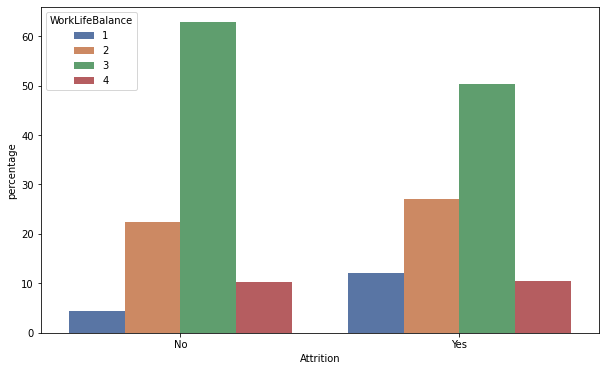

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "percentage", hue="WorkLifeBalance", palette="deep", ax=ax, data = temp)
plt.show()

Não parece uma diferença tão expressiva

## YearsAtCompany

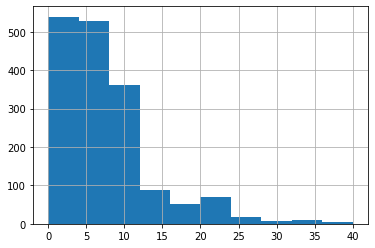

In [ ]:
df["YearsAtCompany"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


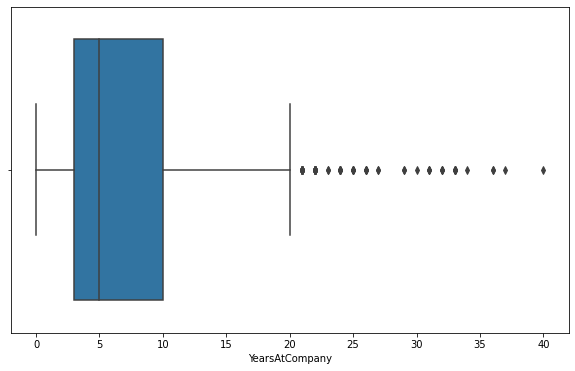

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df["YearsAtCompany"])
fig.show()

Alguns outliers

In [ ]:
df.groupby("Attrition")["YearsAtCompany"].mean()

Attrition
No    7.48
Yes   3.69
Name: YearsAtCompany, dtype: float64

In [ ]:
df.groupby("Attrition")["YearsAtCompany"].median()

Attrition
No    6.00
Yes   2.00
Name: YearsAtCompany, dtype: float64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e pelo tempo( em anos) na empresa
temp = df_temp.groupby("Attrition")["YearsAtCompany"].median().reset_index(name="Median_YearsAtCompany")
temp

,Attrition,Median_YearsAtCompany
0,No,6.00
1,Yes,2.00


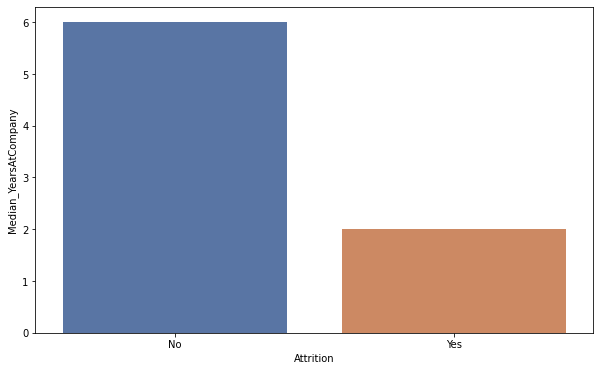

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "Median_YearsAtCompany", palette="deep", ax=ax, data = temp)
plt.show()

Pessoas que tem menos tempo na empresa, tendem a sair mais

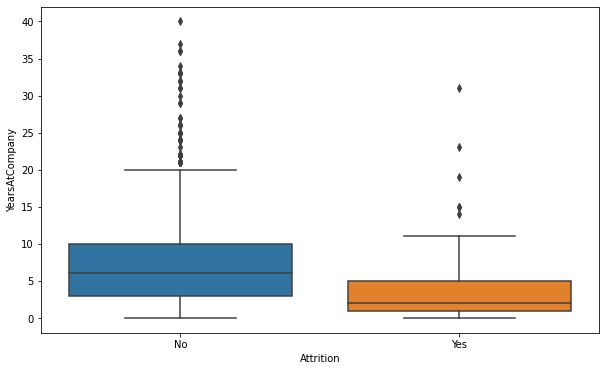

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, y="YearsAtCompany", x="Attrition")
fig.show()

## YearsInCurrentRole

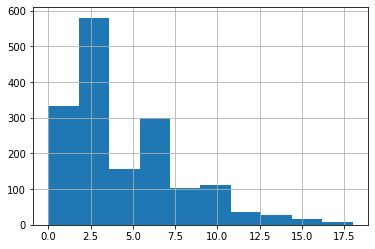

In [ ]:
df["YearsInCurrentRole"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


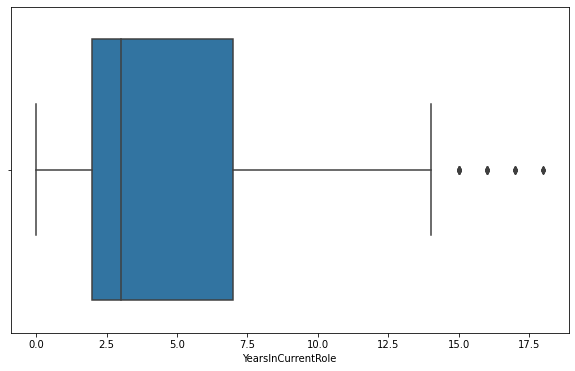

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df["YearsInCurrentRole"])
fig.show()

Poucos outliers

In [ ]:
df.groupby("Attrition")["YearsInCurrentRole"].mean()

Attrition
No    4.54
Yes   2.21
Name: YearsInCurrentRole, dtype: float64

In [ ]:
df.groupby("Attrition")["YearsInCurrentRole"].median()

Attrition
No    3.00
Yes   2.00
Name: YearsInCurrentRole, dtype: float64

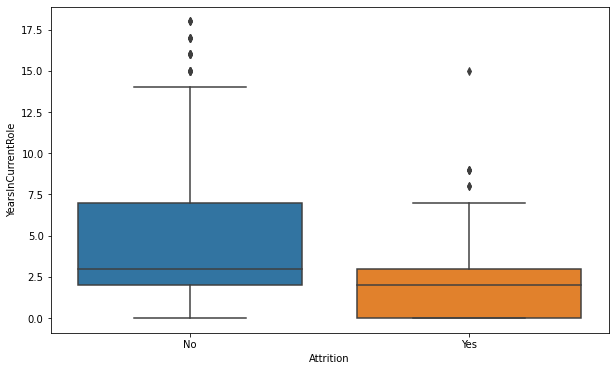

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, y="YearsInCurrentRole", x="Attrition")
fig.show()

## YearsSinceLastPromotion

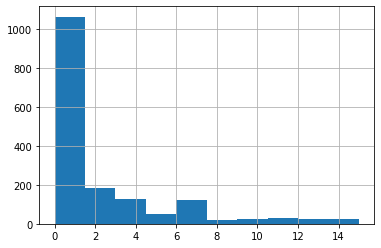

In [ ]:
df["YearsSinceLastPromotion"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


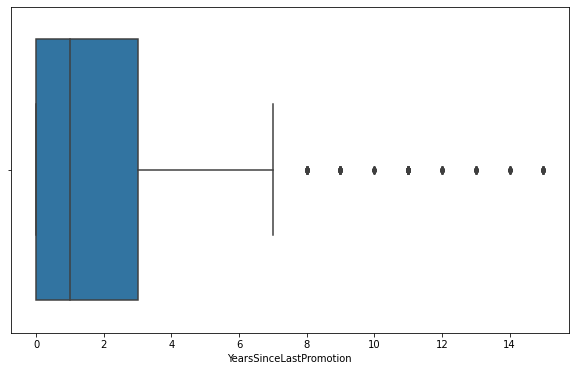

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df["YearsSinceLastPromotion"])
fig.show()

Alguns outliers

In [ ]:
df.groupby("Attrition")["YearsSinceLastPromotion"].mean()

Attrition
No    2.30
Yes   1.44
Name: YearsSinceLastPromotion, dtype: float64

In [ ]:
df.groupby("Attrition")["YearsSinceLastPromotion"].median()

Attrition
No    1.00
Yes   0.00
Name: YearsSinceLastPromotion, dtype: float64

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e peloa anos desde a última promoção
temp = df_temp.groupby("Attrition")["YearsSinceLastPromotion"].mean().reset_index(name="Mean_YearsSinceLastPromotion")
temp

,Attrition,Mean_YearsSinceLastPromotion
0,No,2.30
1,Yes,1.44


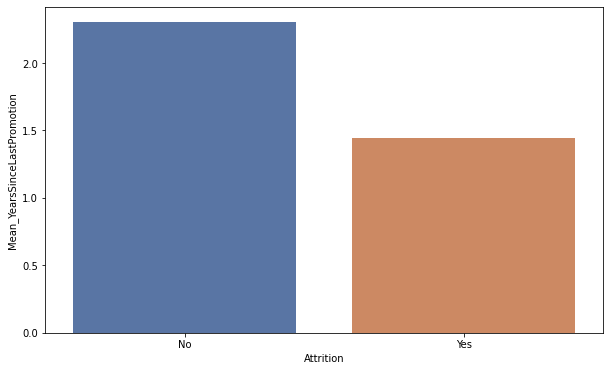

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "Mean_YearsSinceLastPromotion", palette="deep", ax=ax, data = temp)
plt.show()

Esperaria o contrário. Mas talvez o que esteja diminuindo esse resultado naquelas pessoas que optaram a sair, seja que elas nunca foram promovidas

In [ ]:
# Criando uma nova tabela com a quantidade de pessoas agrupadas pela decisão de ter saído ou não, e peloa anos desde a última promoção
temp = df_temp.groupby("Attrition")["YearsSinceLastPromotion"].median().reset_index(name="Median_YearsSinceLastPromotion")
temp

,Attrition,Median_YearsSinceLastPromotion
0,No,1.00
1,Yes,0.00


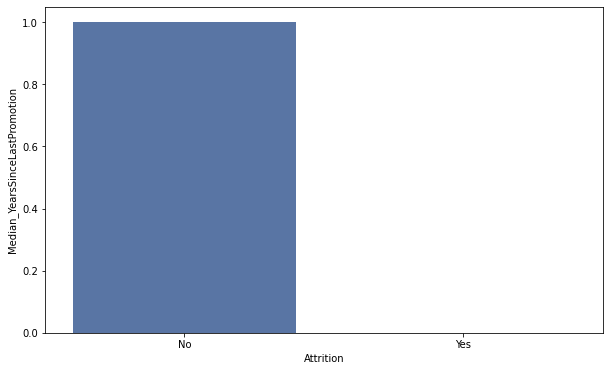

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( x="Attrition", y = "Median_YearsSinceLastPromotion", palette="deep", ax=ax, data = temp)
plt.show()

Deixando mais forte a suspeição anterior

## YearsWithCurrManager

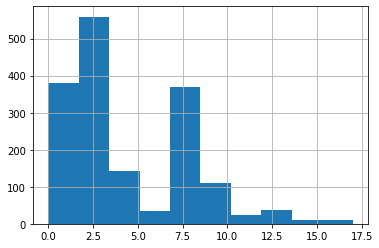

In [ ]:
df["YearsWithCurrManager"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


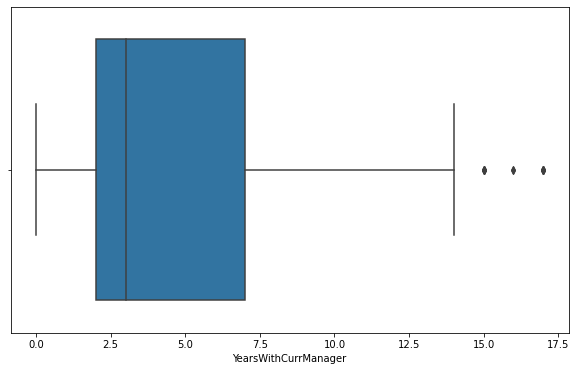

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df["YearsWithCurrManager"])
fig.show()

Poucos outliers

In [ ]:
df.groupby("Attrition")["YearsWithCurrManager"].mean()

Attrition
No    4.40
Yes   2.19
Name: YearsWithCurrManager, dtype: float64

In [ ]:
df.groupby("Attrition")["YearsWithCurrManager"].median()

Attrition
No    3.00
Yes   2.00
Name: YearsWithCurrManager, dtype: float64

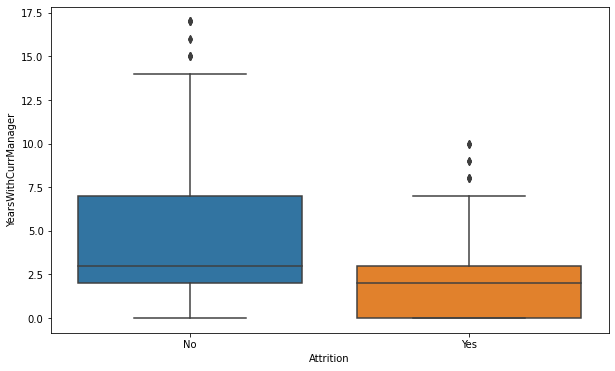

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, y="YearsWithCurrManager", x="Attrition")
fig.show()

# Feature Engineering

## Criação Novas Variáveis

In [8]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Ratio_Monthly_IncomeRate

In [10]:
df.drop(columns=["MonthlyRate"], inplace=True)

In [11]:
df.drop(columns=["HourlyRate", "DailyRate"], inplace=True)

### Starting_Age

In [12]:
df["Starting_Age"] = df["Age"] - df["YearsAtCompany"]

### Overall Satisfaction

* EnvironmentSatisfaction
* JobSatisfaction
* RelationshipSatisfaction

In [13]:
df["Overall_Satisfaction"] = (df["EnvironmentSatisfaction"] + df["JobSatisfaction"] + df["RelationshipSatisfaction"])/3

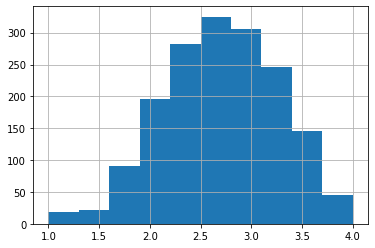

In [14]:
df["Overall_Satisfaction"].hist()

In [15]:
df.drop(columns=["EnvironmentSatisfaction", "RelationshipSatisfaction"], inplace=True)

### Ratio JobInvolvement/JobSatisfaction

In [16]:
df["Ratio_JobInvolvement_Satisfaction"] = df["JobInvolvement"] / df["JobSatisfaction"]

## Retirar variáveis

* Retirar EmployeeID apenas do dataset de treino, já que queremos o output com as probabilidades de Attrition
* Retirar EmployeeCount, já que é igual para o dataset inteiro
* Retirar Over18, já que o dataset inteiro é maior ou igual a 18 anos
* Retirar StandardHours, já que a carga horária de trabalho é igual para todos

In [17]:
# Fazer a modificação em uma cópia do dataset original
df2 = df.copy()

In [18]:
df2.shape

(1676, 33)

In [19]:
df2.drop(columns=["EmployeeCount", "Over18", "StandardHours"], inplace=True)

In [20]:
df2.shape

(1676, 30)

## Alterar categorias

In [21]:
df2["JobRole"].value_counts()

Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64

In [22]:
# Transformar "Admin" em "Administrative"
df2["JobRole"].loc[df["JobRole"] == "Admin"] = "Administrative"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
df2["JobRole"].value_counts()

Nurse             822
Other             534
Therapist         189
Administrative    131
Name: JobRole, dtype: int64

## Alterar variáveis categóricas

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EmployeeID                         1676 non-null   int64  
 1   Age                                1676 non-null   int64  
 2   Attrition                          1676 non-null   object 
 3   BusinessTravel                     1676 non-null   object 
 4   Department                         1676 non-null   object 
 5   DistanceFromHome                   1676 non-null   int64  
 6   Education                          1676 non-null   int64  
 7   EducationField                     1676 non-null   object 
 8   Gender                             1676 non-null   object 
 9   JobInvolvement                     1676 non-null   int64  
 10  JobLevel                           1676 non-null   int64  
 11  JobRole                            1676 non-null   objec

### Attrition

In [25]:
# Tranformando "Attrition" em int
df2["Attrition"].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

In [26]:
encoder = LabelEncoder()
df2["Attrition"] = encoder.fit_transform(df2["Attrition"])

In [27]:
df2["Attrition"].value_counts()

0    1477
1     199
Name: Attrition, dtype: int64

0 - No </br>
1 - Yes

### BusinessTravel

In [28]:
df2["BusinessTravel"].value_counts()

Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64

In [29]:
encoder = LabelEncoder()
df2["BusinessTravel"] = encoder.fit_transform(df2["BusinessTravel"])

In [30]:
df2["BusinessTravel"].value_counts()

2    1184
1     320
0     172
Name: BusinessTravel, dtype: int64

0 - Non-Travel </br>
1 - Travel_Frequently  </br>
2 - Travel_Rarely 

### Department

In [31]:
df2["Department"].value_counts()

Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64

In [32]:
encoder = LabelEncoder()
df2["Department"] = encoder.fit_transform(df2["Department"])

In [33]:
df2["Department"].value_counts()

1    796
0    531
2    349
Name: Department, dtype: int64

0 - Cardiology </br>
1 - Maternity  </br>
2 - Neurology

### EducationField

In [34]:
df2["EducationField"].value_counts()

Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64

In [35]:
encoder = LabelEncoder()
df2["EducationField"] = encoder.fit_transform(df2["EducationField"])

In [36]:
df2["EducationField"].value_counts()

1    697
3    524
2    189
5    149
4     88
0     29
Name: EducationField, dtype: int64

0 - Human Resources </br>
1 - Life Sciences  </br>
2 - Marketing  </br>
3 - Medical </br>
4 - Other  </br>
5 - Technical Degree

### Gender

In [37]:
df2["Gender"].value_counts()

Male      998
Female    678
Name: Gender, dtype: int64

In [38]:
encoder = LabelEncoder()
df2["Gender"] = encoder.fit_transform(df2["Gender"])

In [39]:
df2["Gender"].value_counts()

1    998
0    678
Name: Gender, dtype: int64

0 - Female </br>
1 - Male  

### JobRole

In [40]:
df2["JobRole"].value_counts()

Nurse             822
Other             534
Therapist         189
Administrative    131
Name: JobRole, dtype: int64

In [41]:
encoder = LabelEncoder()
df2["JobRole"] = encoder.fit_transform(df2["JobRole"])

In [42]:
df2["JobRole"].value_counts()

1    822
2    534
3    189
0    131
Name: JobRole, dtype: int64

0 - Administrative </br>
1 - Nurse  </br>
2 - Other  </br>
3 - Therapist 

### MaritalStatus

In [43]:
df2["MaritalStatus"].value_counts()

Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64

In [44]:
encoder = LabelEncoder()
df2["MaritalStatus"] = encoder.fit_transform(df2["MaritalStatus"])

In [45]:
df2["MaritalStatus"].value_counts()

1    777
2    522
0    377
Name: MaritalStatus, dtype: int64

0 - Divorced </br>
1 - Married  </br>
2 - Single

### OverTime

In [46]:
df2["OverTime"].value_counts()

No     1200
Yes     476
Name: OverTime, dtype: int64

In [47]:
encoder = LabelEncoder()
df2["OverTime"] = encoder.fit_transform(df2["OverTime"])

In [48]:
df2["OverTime"].value_counts()

0    1200
1     476
Name: OverTime, dtype: int64

0 - No </br>
1 - Yes

## Separando Features de Target

In [49]:
# DataFrame apenas com as Features
x = df2.copy()
x.drop(columns="Attrition", inplace=True)

In [50]:
x.shape

(1676, 29)

In [51]:
df2.shape

(1676, 30)

In [52]:
# DataFrame com o target 
y = df2["Attrition"]

In [53]:
y.shape

(1676,)

## Normalizando os dados


In [54]:
from sklearn.preprocessing import normalize

In [55]:
# Guardando a ordem dos IDs antes de ocorrer a normalização dos dados 
x_id = x.copy()
x_id = x_id.EmployeeID

In [56]:
x.head()

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Starting_Age,Overall_Satisfaction,Ratio_JobInvolvement_Satisfaction
0,1313919,41,2,0,1,2,1,0,3,2,1,4,2,5993,8,1,11,3,0,8,0,1,6,4,0,5,35,2.33,0.75
1,1200302,49,1,1,8,1,1,1,2,2,2,2,1,5130,1,0,23,4,1,10,3,3,10,7,1,7,39,3.00,1.00
2,1060315,37,2,1,2,2,4,1,2,1,1,3,2,2090,6,1,15,3,0,7,3,3,0,0,0,0,37,3.00,0.67
3,1272912,33,1,1,3,4,1,0,3,1,2,3,1,2909,1,1,11,3,0,8,3,3,8,7,3,0,25,3.33,1.00
4,1414939,27,2,1,2,1,3,1,3,1,1,2,1,3468,9,0,12,3,1,6,3,3,2,2,2,2,25,2.33,1.50


In [57]:
# Importar o StandardScaler e normalizar os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)

In [58]:
x.head()

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Starting_Age,Overall_Satisfaction,Ratio_JobInvolvement_Satisfaction
0,-0.57,0.45,0.59,-1.24,-1.01,-0.88,-0.93,-1.21,0.39,-0.06,-0.59,1.14,1.26,-0.11,2.15,1.59,-1.15,-0.42,-0.94,-0.43,-2.18,-2.52,-0.17,-0.07,-0.68,0.24,0.56,-0.62,-0.62
1,-1.03,1.33,-0.91,0.15,-0.15,-1.86,-0.93,0.82,-1.02,-0.06,0.67,-0.67,-0.12,-0.29,-0.67,-0.63,2.14,2.38,0.23,-0.17,0.15,0.33,0.49,0.75,-0.37,0.80,0.99,0.44,-0.33
2,-1.59,0.01,0.59,0.15,-0.89,-0.88,1.33,0.82,-1.02,-0.96,-0.59,0.24,1.26,-0.94,1.35,1.59,-0.05,-0.42,-0.94,-0.55,0.15,0.33,-1.15,-1.18,-0.68,-1.16,0.78,0.44,-0.71
3,-0.74,-0.42,-0.91,0.15,-0.76,1.07,-0.93,-1.21,0.39,-0.96,0.67,0.24,-0.12,-0.76,-0.67,1.59,-1.15,-0.42,-0.94,-0.43,0.15,0.33,0.16,0.75,0.25,-1.16,-0.52,0.97,-0.33
4,-0.17,-1.08,0.59,0.15,-0.89,-1.86,0.58,0.82,0.39,-0.96,-0.59,-0.67,-0.12,-0.64,2.56,-0.63,-0.88,-0.42,0.23,-0.68,0.15,0.33,-0.83,-0.62,-0.06,-0.60,-0.52,-0.62,0.25


## Checando as variáveis correlacionadas entre si

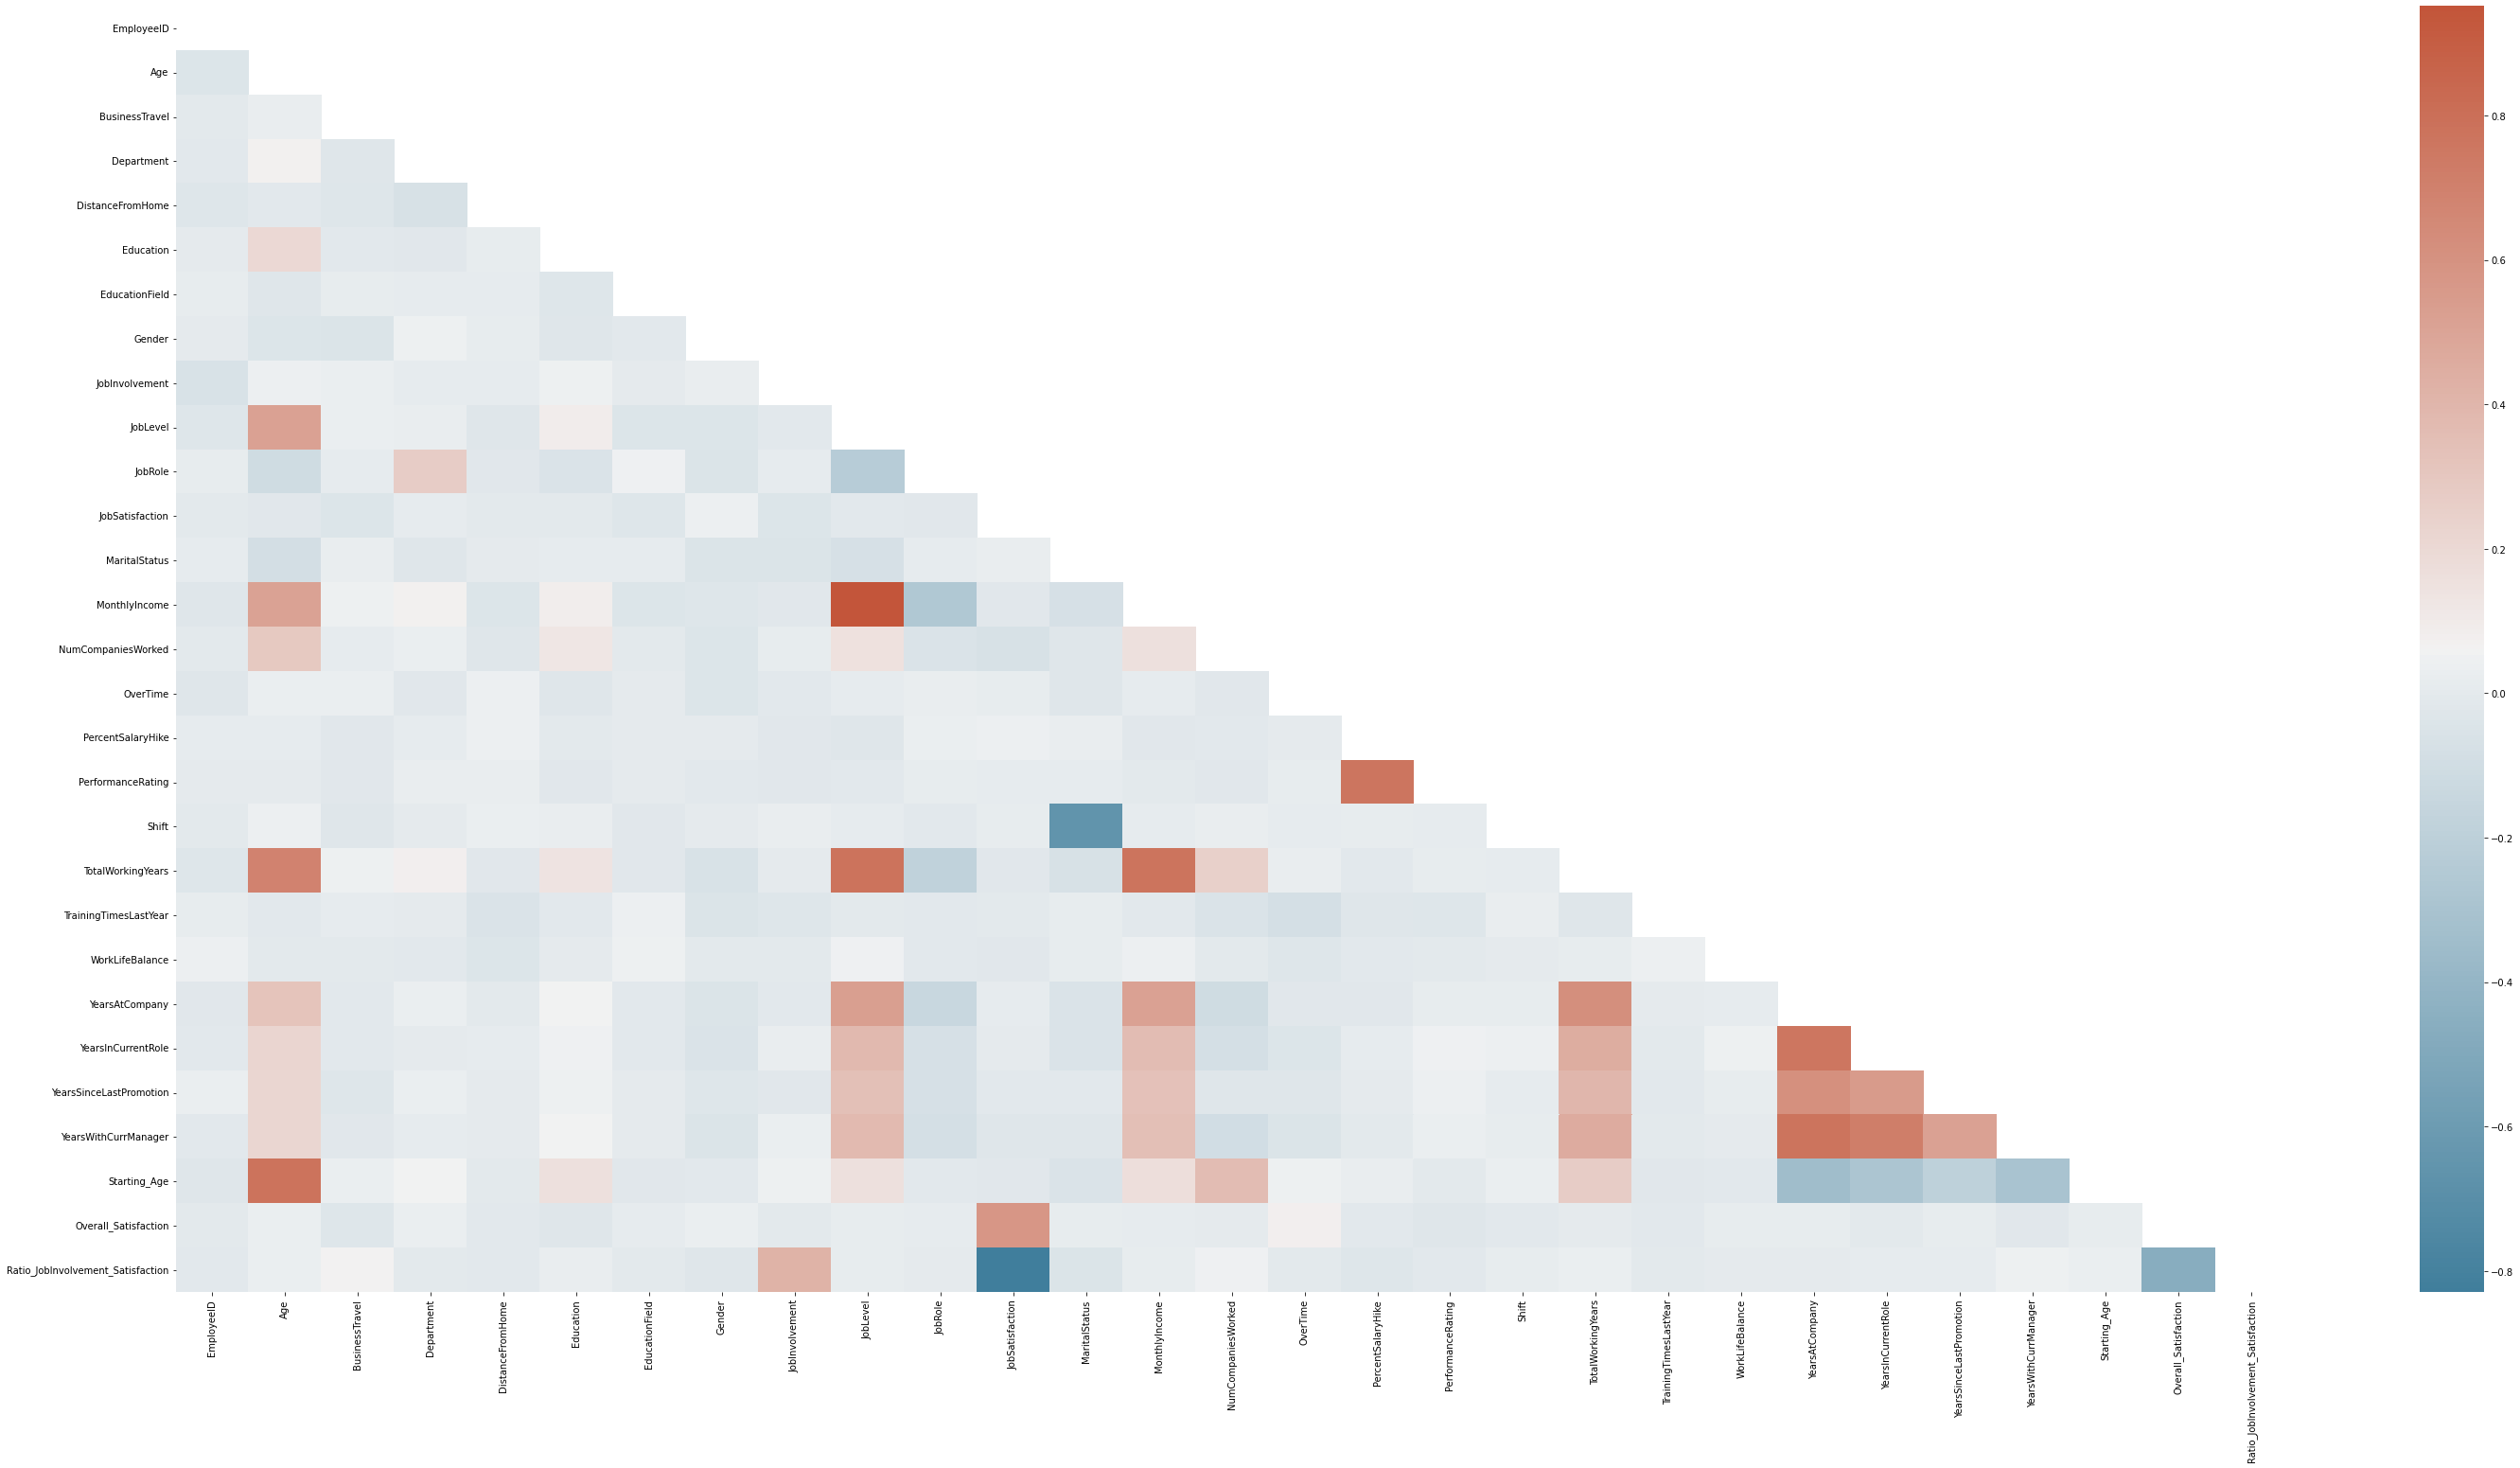

In [59]:
corr_matrix = x.corr()
f, ax = plt.subplots(figsize=(50, 25))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=cmap)

In [60]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Age - Starting_Age
JobLevel - MonthlyIncome
JobLevel - TotalWorkingYears
JobSatisfaction - Ratio_JobInvolvement_Satisfaction
MonthlyIncome - TotalWorkingYears
PercentSalaryHike - PerformanceRating
YearsAtCompany - YearsInCurrentRole
YearsAtCompany - YearsWithCurrManager
YearsInCurrentRole - YearsWithCurrManager
{'PercentSalaryHike', 'YearsInCurrentRole', 'JobLevel', 'YearsAtCompany', 'MonthlyIncome', 'Age', 'JobSatisfaction'}


In [61]:
correlated_features.remove('MonthlyIncome')

In [62]:
x2 = x.drop(labels=correlated_features, axis=1)

In [63]:
#x2 = x.copy()

In [64]:
x2.shape

(1676, 23)

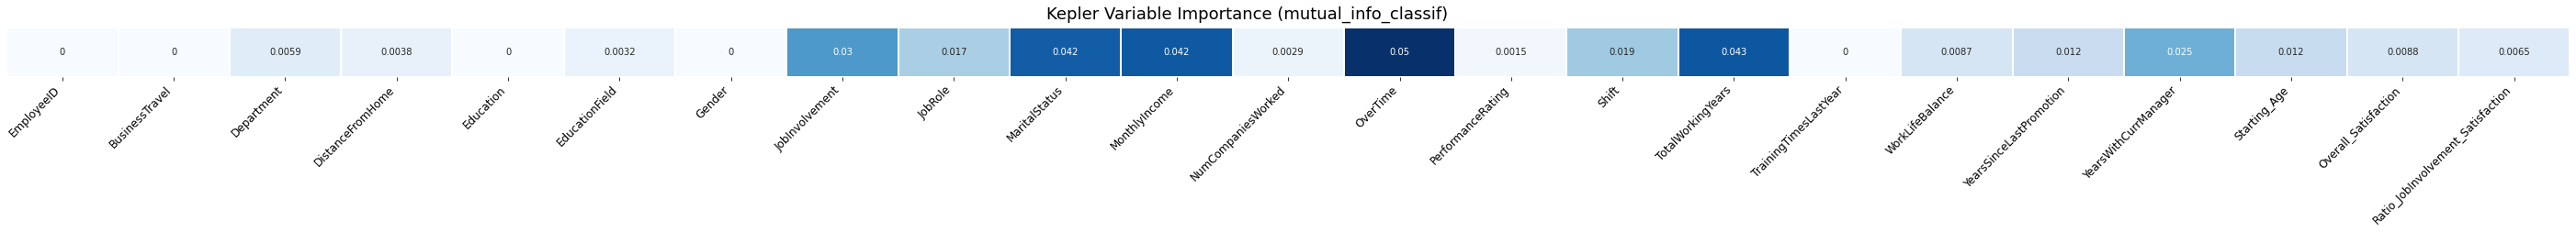

In [65]:
kepler_mutual_information = mutual_info_classif(x2, y)

plt.subplots(1, figsize=(50, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(x2.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

## Split

In [66]:
x2.columns

Index(['EmployeeID', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobInvolvement', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PerformanceRating', 'Shift', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Starting_Age', 'Overall_Satisfaction',
       'Ratio_JobInvolvement_Satisfaction'],
      dtype='object')

In [67]:
x2.drop(columns='PerformanceRating', inplace=True)

In [68]:
y.value_counts()

0    1477
1     199
Name: Attrition, dtype: int64

In [69]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(x2,y,test_size=.2,random_state=1)

In [70]:
X_train.shape

(1340, 22)

In [71]:
X_train.drop(columns='EmployeeID', inplace=True)

In [72]:
X_train.shape

(1340, 21)

# Avaliando a Performance

## Acurácia - Validação Cruzada

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

cross_val_score(model_KNN, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.8925373134328358

In [75]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(random_state=42)
model_DecisionTree.fit(X_train, y_train)

cross_val_score(model_DecisionTree, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.8813432835820896

In [76]:
# Random Forest

model_RandomForest = RandomForestClassifier(random_state=42)
model_RandomForest.fit(X_train, y_train)

cross_val_score(model_RandomForest, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.9059701492537313

In [77]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression

model_LogisticRegression = LogisticRegression(random_state=42)
model_LogisticRegression.fit(X_train, y_train)

cross_val_score(model_LogisticRegression, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.9246268656716417

In [78]:
# Light GBM

model_LightGBM = lgb.LGBMClassifier(random_state=42)
model_LightGBM.fit(X_train, y_train)

cross_val_score(model_LightGBM, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.917910447761194

In [79]:
# XGBoost

model_XGBoost = xgb.XGBClassifier(random_state=42)
model_XGBoost.fit(X_train, y_train)

cross_val_score(model_XGBoost, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.9216417910447762

## Matriz de Confusão

In [80]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

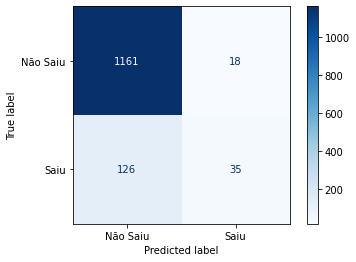

In [81]:
# KNN
y_train_pred_KNN = cross_val_predict(model_KNN,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_KNN) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Não Saiu', 'Saiu'])
disp.plot(cmap='Blues')


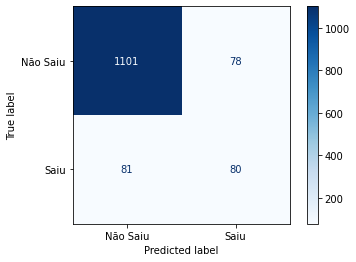

In [82]:
# Decision Tree
y_train_pred_DT = cross_val_predict(model_DecisionTree,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_DT) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Não Saiu', 'Saiu'])
disp.plot(cmap='Blues')


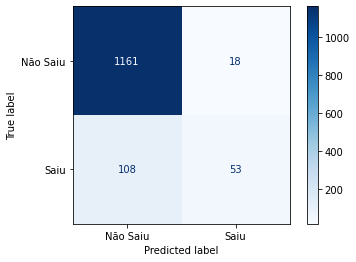

In [83]:
# Random Forest
y_train_pred_RF = cross_val_predict(model_RandomForest,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_RF) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Não Saiu', 'Saiu'])
disp.plot(cmap='Blues')


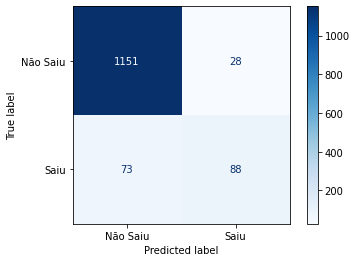

In [84]:
# Regressão Logística
y_train_pred_RL = cross_val_predict(model_LogisticRegression,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_RL) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Não Saiu', 'Saiu'])
disp.plot(cmap='Blues')


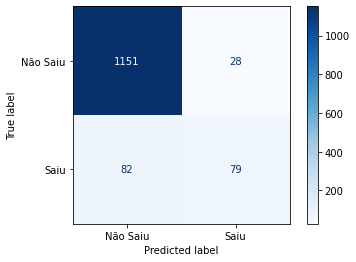

In [85]:
# Light GBM
y_train_pred_LGBM = cross_val_predict(model_LightGBM,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_LGBM) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Não Saiu', 'Saiu'])
disp.plot(cmap='Blues')


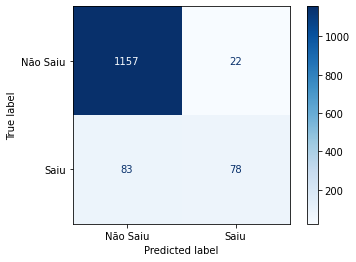

In [86]:
# XGBoost
y_train_pred_XGB = cross_val_predict(model_XGBoost,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_XGB) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Não Saiu', 'Saiu'])
disp.plot(cmap='Blues')


## Precisão, Sensibilidade (Recall) e F1 Score

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [88]:
# KNN
print("Precisão: {}".format(precision_score(y_train, y_train_pred_KNN)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_KNN)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_KNN)))

Precisão: 0.660377358490566
Sensibilidade: 0.21739130434782608
F1 Score: 0.32710280373831774


In [89]:
# Decision Tree
print("Precisão: {}".format(precision_score(y_train, y_train_pred_DT)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_DT)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_DT)))

Precisão: 0.5063291139240507
Sensibilidade: 0.4968944099378882
F1 Score: 0.5015673981191222


In [90]:
# Random Forest
print("Precisão: {}".format(precision_score(y_train, y_train_pred_RF)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_RF)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_RF)))

Precisão: 0.7464788732394366
Sensibilidade: 0.32919254658385094
F1 Score: 0.45689655172413796


In [123]:
# Regressão Logística
print("Precisão: {}".format(precision_score(y_train, y_train_pred_RL)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_RL)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_RL)))

Acurácia: 0.92
Precisão: 0.7586206896551724
Sensibilidade: 0.546583850931677
F1 Score: 0.6353790613718413


In [92]:
# Light GBM
print("Precisão: {}".format(precision_score(y_train, y_train_pred_LGBM)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_LGBM)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_LGBM)))

Precisão: 0.7383177570093458
Sensibilidade: 0.4906832298136646
F1 Score: 0.5895522388059702


In [93]:
# XGBoost
print("Precisão: {}".format(precision_score(y_train, y_train_pred_XGB)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_XGB)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_XGB)))

Precisão: 0.78
Sensibilidade: 0.484472049689441
F1 Score: 0.5977011494252874


## Precision/Recall Tradeoff

### Random Forest

In [94]:
# [:,1] é para selecionar apenas as probabilidades de target =1
y_scores_RF = cross_val_predict(model_RandomForest, X_train, y_train, cv=3, method='predict_proba')[:,1] 

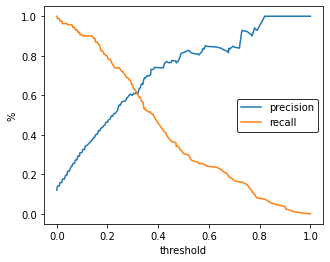

In [95]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores_RF) 
thresholds = np.append(thresholds, 1) 

fig, ax = plt.subplots(figsize =[5, 4])
plt.plot(thresholds, precisions, color=sns.color_palette()[0]) 
plt.plot(thresholds, recalls, color=sns.color_palette()[1]) 

leg = plt.legend(('precision', 'recall'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')
plt.show()

### Regressão Logística

In [96]:
# [:,1] é para selecionar apenas as probabilidades de target =1
y_scores_RL = cross_val_predict(model_LogisticRegression, X_train, y_train, cv=3, method='predict_proba')[:,1] 

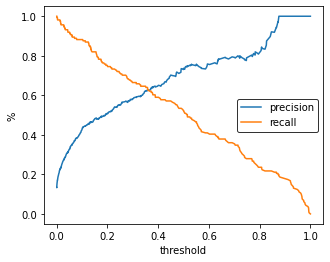

In [97]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores_RL) 
thresholds = np.append(thresholds, 1) 

fig, ax = plt.subplots(figsize =[5, 4])
plt.plot(thresholds, precisions, color=sns.color_palette()[0]) 
plt.plot(thresholds, recalls, color=sns.color_palette()[1]) 

leg = plt.legend(('precision', 'recall'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')
plt.show()

In [98]:
y_train_pred_balanced = (y_scores_RL >= 0.35) # Valor de threshold com equilíbrio entre precision e recall

In [99]:
precision_score(y_train, y_train_pred_balanced) 

0.6227544910179641

In [100]:
recall_score(y_train, y_train_pred_balanced)

0.6459627329192547

### Light  GBM

In [101]:
# [:,1] é para selecionar apenas as probabilidades de target =1
y_scores = cross_val_predict(model_LightGBM, X_train, y_train, cv=3, method='predict_proba')[:,1] 

In [102]:
from sklearn.metrics import precision_recall_curve

In [103]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores)

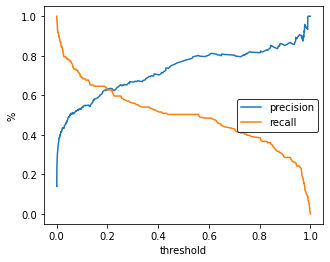

In [104]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores) 
thresholds = np.append(thresholds, 1) 

fig, ax = plt.subplots(figsize =[5, 4])
plt.plot(thresholds, precisions, color=sns.color_palette()[0]) 
plt.plot(thresholds, recalls, color=sns.color_palette()[1]) 

leg = plt.legend(('precision', 'recall'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')
plt.show()

In [105]:
y_train_pred_balanced = (y_scores >= 0.2) # Valor de threshold com equilíbrio entre precision e recall

In [106]:
precision_score(y_train, y_train_pred_balanced)

0.63125

In [107]:
recall_score(y_train, y_train_pred_balanced)

0.6273291925465838

### XGBoost

In [108]:
# [:,1] é para selecionar apenas as probabilidades de target =1
y_scores_XGB = cross_val_predict(model_XGBoost, X_train, y_train, cv=3, method='predict_proba')[:,1] 

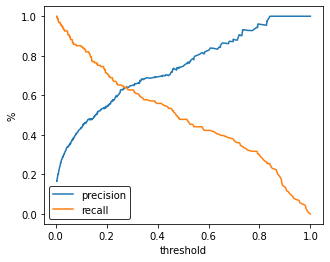

In [109]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores_XGB) 
thresholds = np.append(thresholds, 1) 

fig, ax = plt.subplots(figsize =[5, 4])
plt.plot(thresholds, precisions, color=sns.color_palette()[0]) 
plt.plot(thresholds, recalls, color=sns.color_palette()[1]) 

leg = plt.legend(('precision', 'recall'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')
plt.show()

In [110]:
y_train_pred_balanced = (y_scores_XGB >= 0.26) # Valor de threshold com equilíbrio entre precision e recall

In [111]:
precision_score(y_train, y_train_pred_balanced) 

0.6265060240963856

In [112]:
recall_score(y_train, y_train_pred_balanced)

0.6459627329192547

## Curva ROC

### Random Forest

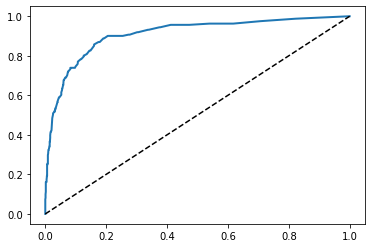

In [113]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_RF)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr,tpr)
plt.show()

In [114]:
roc_auc_score(y_train, y_scores_RF)

0.9090897117780624

### Regressão logística

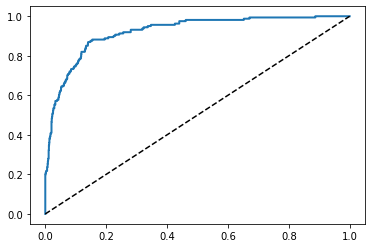

In [115]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_RL)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr,tpr)
plt.show()

In [116]:
roc_auc_score(y_train, y_scores)

0.922631559538297

### Light GBM

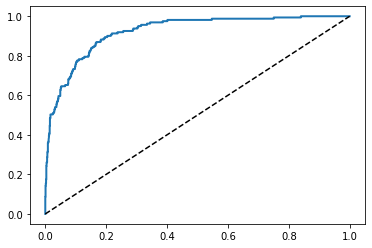

In [117]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr,tpr)
plt.show()

In [118]:
roc_auc_score(y_train, y_scores)

0.922631559538297

### XGBoost

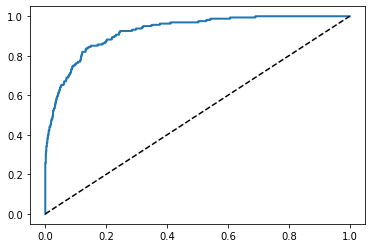

In [119]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_XGB)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr,tpr)
plt.show()

In [120]:
roc_auc_score(y_train, y_scores_XGB)

0.9237800220209778

# Otimização de Hiperparâmetros

## Random Search

### Regressão Logística

In [ ]:
# Opções de parâmetros para testar
parameters = {
              'penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C' : np.logspace(0, 4, num=10)
              }
          
clf = RandomizedSearchCV(model_LogisticRegression,parameters,n_iter=100,
                         random_state=42)

clf.fit(X_train, y_train)

In [ ]:
# Parâmetros com melhor resultado
clf.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}

In [ ]:
# Regressão Logística

model_LogisticRegression = LogisticRegression(random_state=42, solver = 'lbfgs', 
                                              penalty= 'l2', C= 1.0)

model_LogisticRegression.fit(X_train, y_train)

cross_val_score(model_LogisticRegression, X_train, y_train,cv=5, scoring='accuracy').mean() 


0.9246268656716417

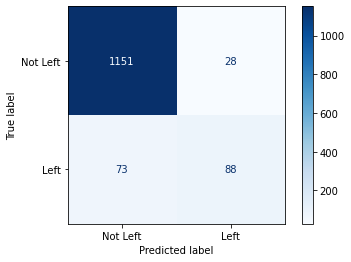

In [ ]:
# Regressão Logística
y_train_pred_RL = cross_val_predict(model_LogisticRegression,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_RL) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Não Saiu', 'Saiu'])
disp.plot(cmap='Blues')


In [ ]:
# [:,1] é para selecionar apenas as probabilidades de target =1
y_scores_RL = cross_val_predict(model_LogisticRegression, X_train, y_train, cv=3, method='predict_proba')[:,1] 

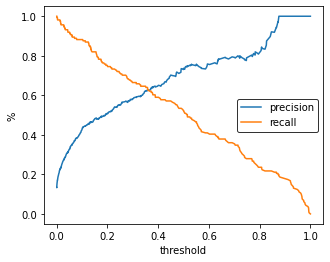

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores_RL) 
thresholds = np.append(thresholds, 1) 

fig, ax = plt.subplots(figsize =[5, 4])
plt.plot(thresholds, precisions, color=sns.color_palette()[0]) 
plt.plot(thresholds, recalls, color=sns.color_palette()[1]) 

leg = plt.legend(('precision', 'recall'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')
plt.show()

In [131]:
y_train_pred_balanced = (y_scores_RL >= 0.37) # Valor de threshold com equilíbrio entre precision e recall

In [132]:
precision_score(y_train, y_train_pred_balanced) 

0.6329113924050633

In [133]:
recall_score(y_train, y_train_pred_balanced)

0.6211180124223602

# Regressão logística

In [134]:
# Regressão Logística
model_LogisticRegression = LogisticRegression(random_state=42, solver = 'lbfgs', 
                                              penalty= 'l2', C= 1.0)

model_LogisticRegression.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [135]:
X_test2 = X_test.copy()

In [136]:
X_test.drop(columns="EmployeeID", inplace=True)

In [137]:
y_scores_pred_RL = model_LogisticRegression.predict_proba(X_test)[:,1] 

In [138]:
pred_RL = (y_scores_pred_RL >= 0.37) 
# 0,37 foi o valor do threshold com maior precisão e sensbilidade no cross validation

In [140]:
print("Acurácia: {:.2f}".format(accuracy_score(y_test, pred_RL)))
print("Precisão: {:.2f}".format(precision_score(y_test, pred_RL)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, pred_RL)))
print("F1 Score: {:.2f}".format(f1_score(y_test, pred_RL)))

Acurácia: 0.94
Precisão: 0.74
Sensibilidade: 0.74
F1 Score: 0.74


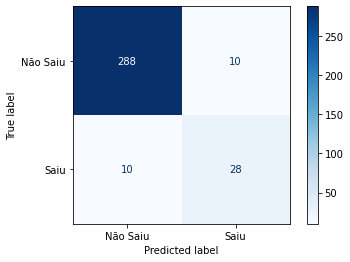

In [146]:
# Creating the Confusion Matrix
cm_RL = confusion_matrix(y_test, pred_RL)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_RL, display_labels=['Não Saiu', 'Saiu'])
disp.plot(cmap='Blues')

In [147]:
print(classification_report(y_test, pred_RL, target_names=['Não Saiu', 'Saiu']))


              precision    recall  f1-score   support

    Não Saiu       0.97      0.97      0.97       298
        Saiu       0.74      0.74      0.74        38

    accuracy                           0.94       336
   macro avg       0.85      0.85      0.85       336
weighted avg       0.94      0.94      0.94       336



In [143]:
# AUC Treino
roc_auc_score(y_train, y_scores_RL)

0.9212196882293132

In [144]:
# AUC Teste
roc_auc_score(y_test, y_scores_pred_RL)

0.9148710702931826

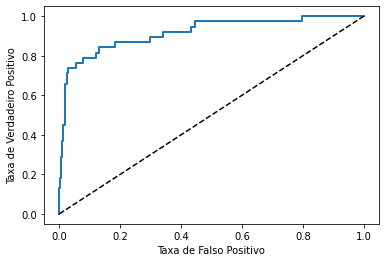

Área Sob a Curva ROC (AUC): 0.9149


In [145]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores_pred_RL)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr,tpr)
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

print("Área Sob a Curva ROC (AUC): {:.4f}".format(roc_auc_score(y_test, y_scores_pred_RL)))

# Probabilidade

In [ ]:
# A ordem dos IDs que foi criado antes de ocorrer a normalização dos dados 
x_id.head()

0    1313919
1    1200302
2    1060315
3    1272912
4    1414939
Name: EmployeeID, dtype: int64

In [ ]:
X_test2.columns

Index(['EmployeeID', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobInvolvement', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Starting_Age', 'Overall_Satisfaction',
       'Ratio_JobInvolvement_Satisfaction'],
      dtype='object')

In [ ]:
# Uma cópia das features de teste antes de retirar a coluna EmployeeID
X_test2.head()

,EmployeeID,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,Starting_Age,Overall_Satisfaction,Ratio_JobInvolvement_Satisfaction
979,-0.74,-0.91,0.15,-0.27,0.09,-0.93,0.82,1.79,0.67,-1.49,-0.83,-0.67,-0.63,2.57,-0.94,-0.63,0.33,-0.68,-0.32,0.45,1.50,0.05
1336,-0.86,0.59,1.55,-0.27,-1.86,-0.93,0.82,0.39,0.67,1.26,-0.86,-0.67,1.59,-0.94,-1.32,-0.63,0.33,-0.68,-1.16,-0.96,-0.62,0.25
881,0.24,0.59,-1.24,0.10,0.09,2.09,-1.21,-1.02,-0.59,-1.49,0.07,1.75,-0.63,0.23,-0.55,-0.63,1.76,-0.37,-0.32,0.56,-1.15,-0.33
258,-0.08,0.59,0.15,-1.01,0.09,-0.93,0.82,0.39,0.67,-0.12,-0.80,-0.67,-0.63,-0.94,-1.32,-2.18,-1.09,-0.68,-1.16,2.19,0.44,-0.62
140,-1.38,0.59,0.15,-0.03,0.09,0.58,-1.21,0.39,-0.59,1.26,-0.49,1.75,-0.63,-0.94,-0.17,-0.63,1.76,-0.68,-0.04,-0.31,-2.74,1.97


In [ ]:
# Criando um dataframe com as informações de ID 
id_df = pd.DataFrame({'id': x_id.values})

In [ ]:
id_df.head()

,id
0,1313919
1,1200302
2,1060315
3,1272912
4,1414939


In [ ]:
# Unindo as informações de ID de acordo com o index do dataset das features de teste 
prob_df = X_test2.merge(id_df, left_index=True, right_index=True)

In [ ]:
prob_df.id.head()

979     1272720
1336    1242148
881     1516360
258     1435995
140     1113668
Name: id, dtype: int64

In [ ]:
# Criando um dataset unindo os números dos IDs + Target + probabilidades de 0 e 1 
prob_df['Target'] = y_test
prob_df['prob_0'] = y_scores_pred_RL = model_LogisticRegression.predict_proba(X_test)[:,0]  
prob_df['prob_1'] = y_scores_pred_RL = model_LogisticRegression.predict_proba(X_test)[:,1] 

In [ ]:
# Selecioando apenas as colunas de interesse 
prob_df = prob_df [["id", "Target", "prob_0", "prob_1"]]

In [ ]:
prob_df.head()

,id,Target,prob_0,prob_1
979,1272720,0,1.00,0.00
1336,1242148,1,0.15,0.85
881,1516360,0,0.97,0.03
258,1435995,0,0.98,0.02
140,1113668,1,0.84,0.16


In [ ]:
# Ordenando de acordo com a probabilidade de Attrition = 1
# Assim eu sei quais são os funcionários mais propensos a sair 
prob_df.sort_values("prob_1", ascending=False)

,id,Target,prob_0,prob_1
1659,1622091,1,0.07,0.93
1252,1196870,1,0.11,0.89
759,1631537,1,0.12,0.88
102,1088304,1,0.12,0.88
718,1034220,1,0.12,0.88
...,...,...,...,...
1051,1705514,0,1.00,0.00
697,1376209,0,1.00,0.00
408,1499671,0,1.00,0.00
231,1470356,0,1.00,0.00


# Shap
Interpretabilidade do modelo

In [ ]:
!pip install git+https://github.com/slundberg/shap -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(model_LogisticRegression, X_train)
shap_values = explainer(X_test)

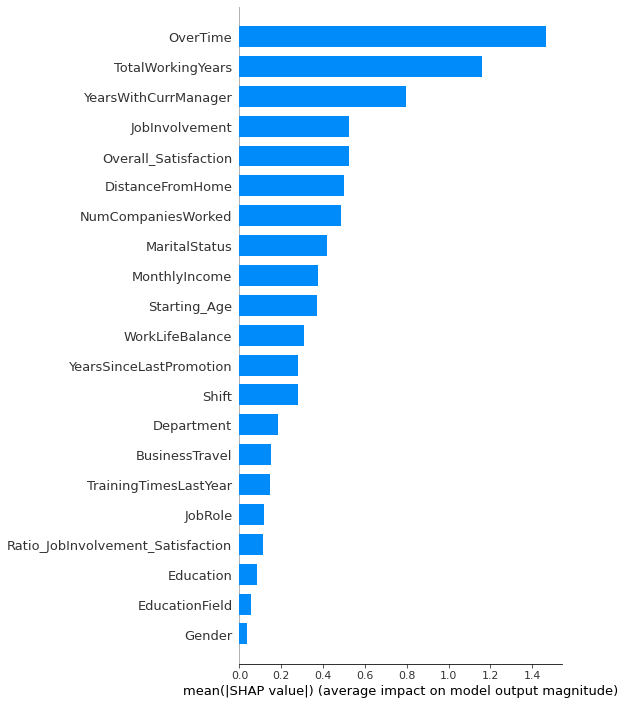

In [ ]:
# Variáveis mais importantes sem distinção com o valor do Target
shap.summary_plot(shap_values, plot_type='bar', max_display=30)

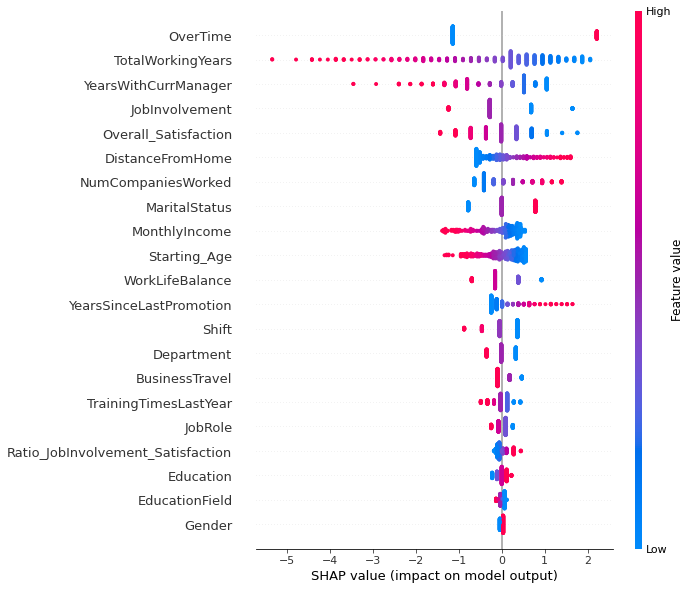

In [ ]:
# Variáveis mais importantes de acordo com seu próprio valor e o valor do Target
shap.plots.beeswarm(shap_values, max_display=30)

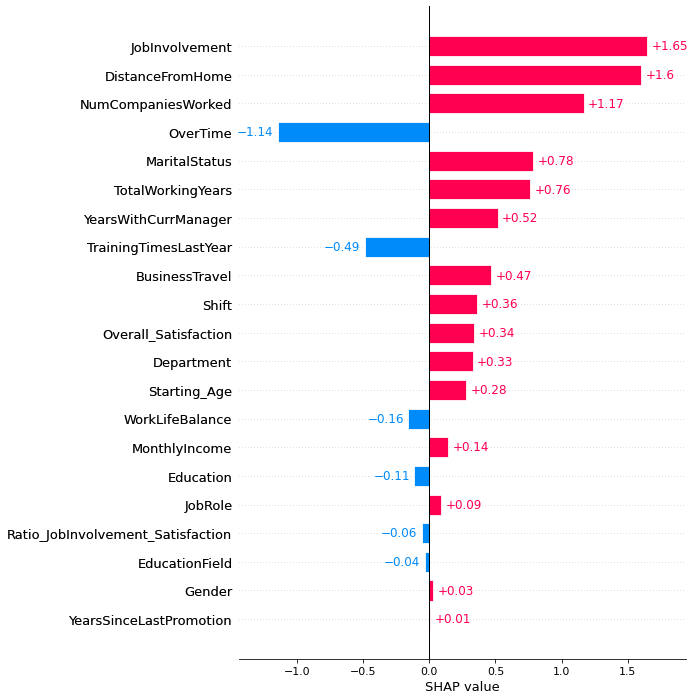

In [ ]:
# Variáveis que influenciaram o Target de um funcionário específico
# Nesse exemplo, o funcionário analisado foi o que obteve maior probabilidade de sair 
shap.plots.bar(shap_values[23],max_display=30)

# Conclusões 

* A performance do modelo de regressão logística foi a melhor performance de acordo com o nosso código. Os ajustes de parâmetros considerando diferentes thresholds foram necessários para que o modelo fosse mais assertivo e otimizado.

  * Antes dos ajustes, o modelo apresentava:

    Recall: 0,76

    Precisão: 0,55

    F1 Score: 0,64

  * Depois dos ajustes, o modelo apresentava:

    Recall: 0,74

    Precisão: 0,74

    F1 Score: 0,74

    Acurácia: 0,94

* Além disso, a área sobre a curva ROC apresentou excelentes resultados para o AUC. Para o treino, o resultado foi de 0,92 e, para o teste, de 0,91, indicando que o modelo apresentou uma alta assertividade e não houve overfitting.

* Concluindo, as horas extras são o fator que mais influencia na decisão do funcionário de sair da área, visto que os funcionários que realizam horas extras tendem a sair.

* Fatores relacionados à idade e anos na área também são relevantes para a análise, já que os mais novos e que têm menos tempo na área também tendem a sair.

* O salário é outro fator importante, visto que os que ganham menos têm maior taxa de evasão.

* O nível envolvimento no trabalho também é um ótimo indicativo se o funcionário sairá ou não.

* Estado civil está muito relacionado à liberdade do funcionário a decidir sair do emprego.

* Por fim, a distância do trabalho à casa também é um fator de peso nessa escolha.




# Próximos Passos

* Nossa sugestão é que sejam feitas outras pesquisas para que a análise seja mais assertiva. Fatores importantes como localização do funcionário, benefícios, classe social, informações sobre a família, dentre outras, podem ser fatores decisivos para a questão.

* Outra sugestão é que o modelo de machine learning possa ser melhorado no futuro, considerando diferentes thresholds e diferentes parâmetros para que se penalize mais os falsos negativos.

* Um dataset maior e com informações de mais funcionários tornaria o modelo preditivo mais assertivo.